#       BANK- MARKETING : A PORTUGAL PERSPECTIVE 

# Aim :

Understanding customer response on telemarketing campaign and finding customer profile for more campaigns. We can see which customer will deposit money and likely to use more campaigns so we will focus on that customer.

# Problem Statement : 

Improvising the marketing strategies which can help the banks improve their reliability and 
increase in Customer Relationship Management through bank products, to identify the main 
factor that can increase the customer’s subscription to a term deposit and creating a predictive 
model which will help the bank marketing team to know which customer will buy the product.

# ! Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'bank-additional-full.csv',delimiter=';')
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

# Domain Analysis :

# Input Variables:

1. Age (numeric): A particular period in somebody’s life.
2. Job : Type of job (categorical:"admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services").
3. Marital : Marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed).
4. Education: The process of teaching or learning, especially in a school or college, or the knowledge that you get from this (categorical: "unknown","secondary","primary","tertiary").
5. Default: has credit in default? (binary: "yes","no")
6. Housing: has housing loan? (binary: "yes","no")
7. Loan: has personal loan? (binary: "yes","no")

*Related with the last contact of the current campaign:

8. Contact: contact communication type (categorical: "unknown","telephone","cellular").
9. Day_of_week: Last contact day of the month (numeric).
10. Month: Last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec").
11. Duration: Last contact duration, in seconds (numeric).

*other attributes:

12. Campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact).

13. Pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means that client was not previously contacted).

14. Previous: Number of contacts performed before this campaign and for this client (numeric).

15. Poutcome: Outcome of the previous marketing campaign (categorical: "unknown","other","failure","success").

*Social and economic context attributes:

16. emp.var.rate: Employment variation rate - quarterly indicator (numeric).
17. cons.price.idx: Consumer price index - monthly indicator (numeric).
18. cons.conf.idx: Consumer confidence index - monthly indicator (numeric).
19. euribor3m: Euribor 3 month rate - daily indicator (numeric).
20. nr.employed: Number of employees - quarterly indicator (numeric).

# Output Variable(Desired target):

21. y: Has the client subscribed a term deposit? (binary: "yes","no")

# ! Dataset Checks

In [3]:
data.shape # to check the number of rows and columns present in the dataset.

(41188, 21)

In [4]:
data.head() # to see the top five rows.

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [5]:
data.tail() # to see the bottom five rows.

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

In [6]:
data.info() # to see the information of the dataset and memory used.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
data.size # to check the size of the dataset.

864948

In [8]:
data.columns # to see all the columns present in the dataset.

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
data.describe().T # to get the statistical report of the numerical columns.

count         mean         std       min       25%  \
age             41188.0    40.024060   10.421250    17.000    32.000   
duration        41188.0   258.285010  259.279249     0.000   102.000   
campaign        41188.0     2.567593    2.770014     1.000     1.000   
pdays           41188.0   962.475454  186.910907     0.000   999.000   
previous        41188.0     0.172963    0.494901     0.000     0.000   
emp.var.rate    41188.0     0.081886    1.570960    -3.400    -1.800   
cons.price.idx  41188.0    93.575664    0.578840    92.201    93.075   
cons.conf.idx   41188.0   -40.502600    4.628198   -50.800   -42.700   
euribor3m       41188.0     3.621291    1.734447     0.634     1.344   
nr.employed     41188.0  5167.035911   72.251528  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

In [10]:
data.describe(include='O') # to get the statistical report of the categorical columns.

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

In [11]:
data.dtypes # to check the datatypes of the columns.

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [12]:
# fetching num_col:
df_num=data.select_dtypes(include=['int64','float']).columns
df_num

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [13]:
# fetching cat_col:
df_cat=data.select_dtypes(include=["object"]).columns
df_cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [14]:
for i in df_cat:
    print(i,data[i].unique()) # to check the unique values present in the particular column
    print(data[i].value_counts()) # to check the number of repetions of subcategroy present in the categorical columns.
    print('#'*40)

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
########################################
marital ['married' 'single' 'divorced' 'unknown']
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
########################################
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown        

# ! DATA PREPROCESSING

In [15]:
data.isnull().sum() # to check if there are any missing values.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
data.duplicated().sum() # to check if there are any duplicate values.

12

In [17]:
duplicates=data[data.duplicated()]
duplicates 

age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    university.degree       no      no   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
1266   telephone   may         thu  ...         1    999         0   
12261  telephone   jul         thu  ...         1    999         0   
14234   cellular   jul         mon  ...         2    999         0   
16956   cellular   jul         thu  ...         3    999         0   
18465   cellular   jul         thu  ...         1    999         0   
20216   cellular   aug         mon  ...         1    999         0   
20534   cellular   aug         tue  ...         1    999         0   
25217   cellular   nov         tue  ...         2    999         0   
28477   cellular   apr         tue  ...         1    999         0   
32516   cellular   may         fri  ...         4    999         0   
36951   cellular   jul         thu  ...         1    999         0   
38281  telephone   oct         tue  ...         1    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
1266   nonexistent          1.1          93.994          -36.4      4.855   
12261  nonexistent          1.4          93.918          -42.7      4.966   
14234  nonexistent          1.4          93.918          -42.7      4.962   
16956  nonexistent          1.4          93.918          -42.7      4.962   
18465  nonexistent          1.4          93.918          -42.7      4.968   
20216  nonexistent          1.4          93.444          -36.1      4.965   
20534  nonexistent          1.4          93.444          -36.1      4.966   
25217  nonexistent         -0.1          93.200          -42.0      4.153   
28477  nonexistent         -1.8          93.075          -47.1      1.423   
32516  nonexistent         -1.8          92.893          -46.2      1.313   
36951  nonexistent         -2.9          92.469          -33.6      1.072   
38281  nonexistent         -3.4          92.431          -26.9      0.742   

       nr.employed    y  
1266        5191.0   no  
12261       5228.1   no  
14234       5228.1   no  
16956       5228.1   no  
18465       5228.1   no  
20216       5228.1   no  
20534       5228.1   no  
25217       5195.8   no  
28477       5099.1   no  
32516       5099.1   no  
36951       5076.2  yes  
38281       5017.5   no  

[12 rows x 21 columns]

In [18]:
data=data.drop_duplicates()
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41176 rows x 21 columns]

# ! EXPLORATORY DATA ANALYSIS

# 1. Univariate Analysis

In [19]:
y=data[["y"]]
df_cat=data.select_dtypes("object").drop(columns=["y"])
df_num=data.select_dtypes("number")

In [20]:
df_num.shape # checking the shape of numerical columns.

(41176, 10)

In [21]:
df_cat.shape # checking the shape of categorical columns.

(41176, 10)

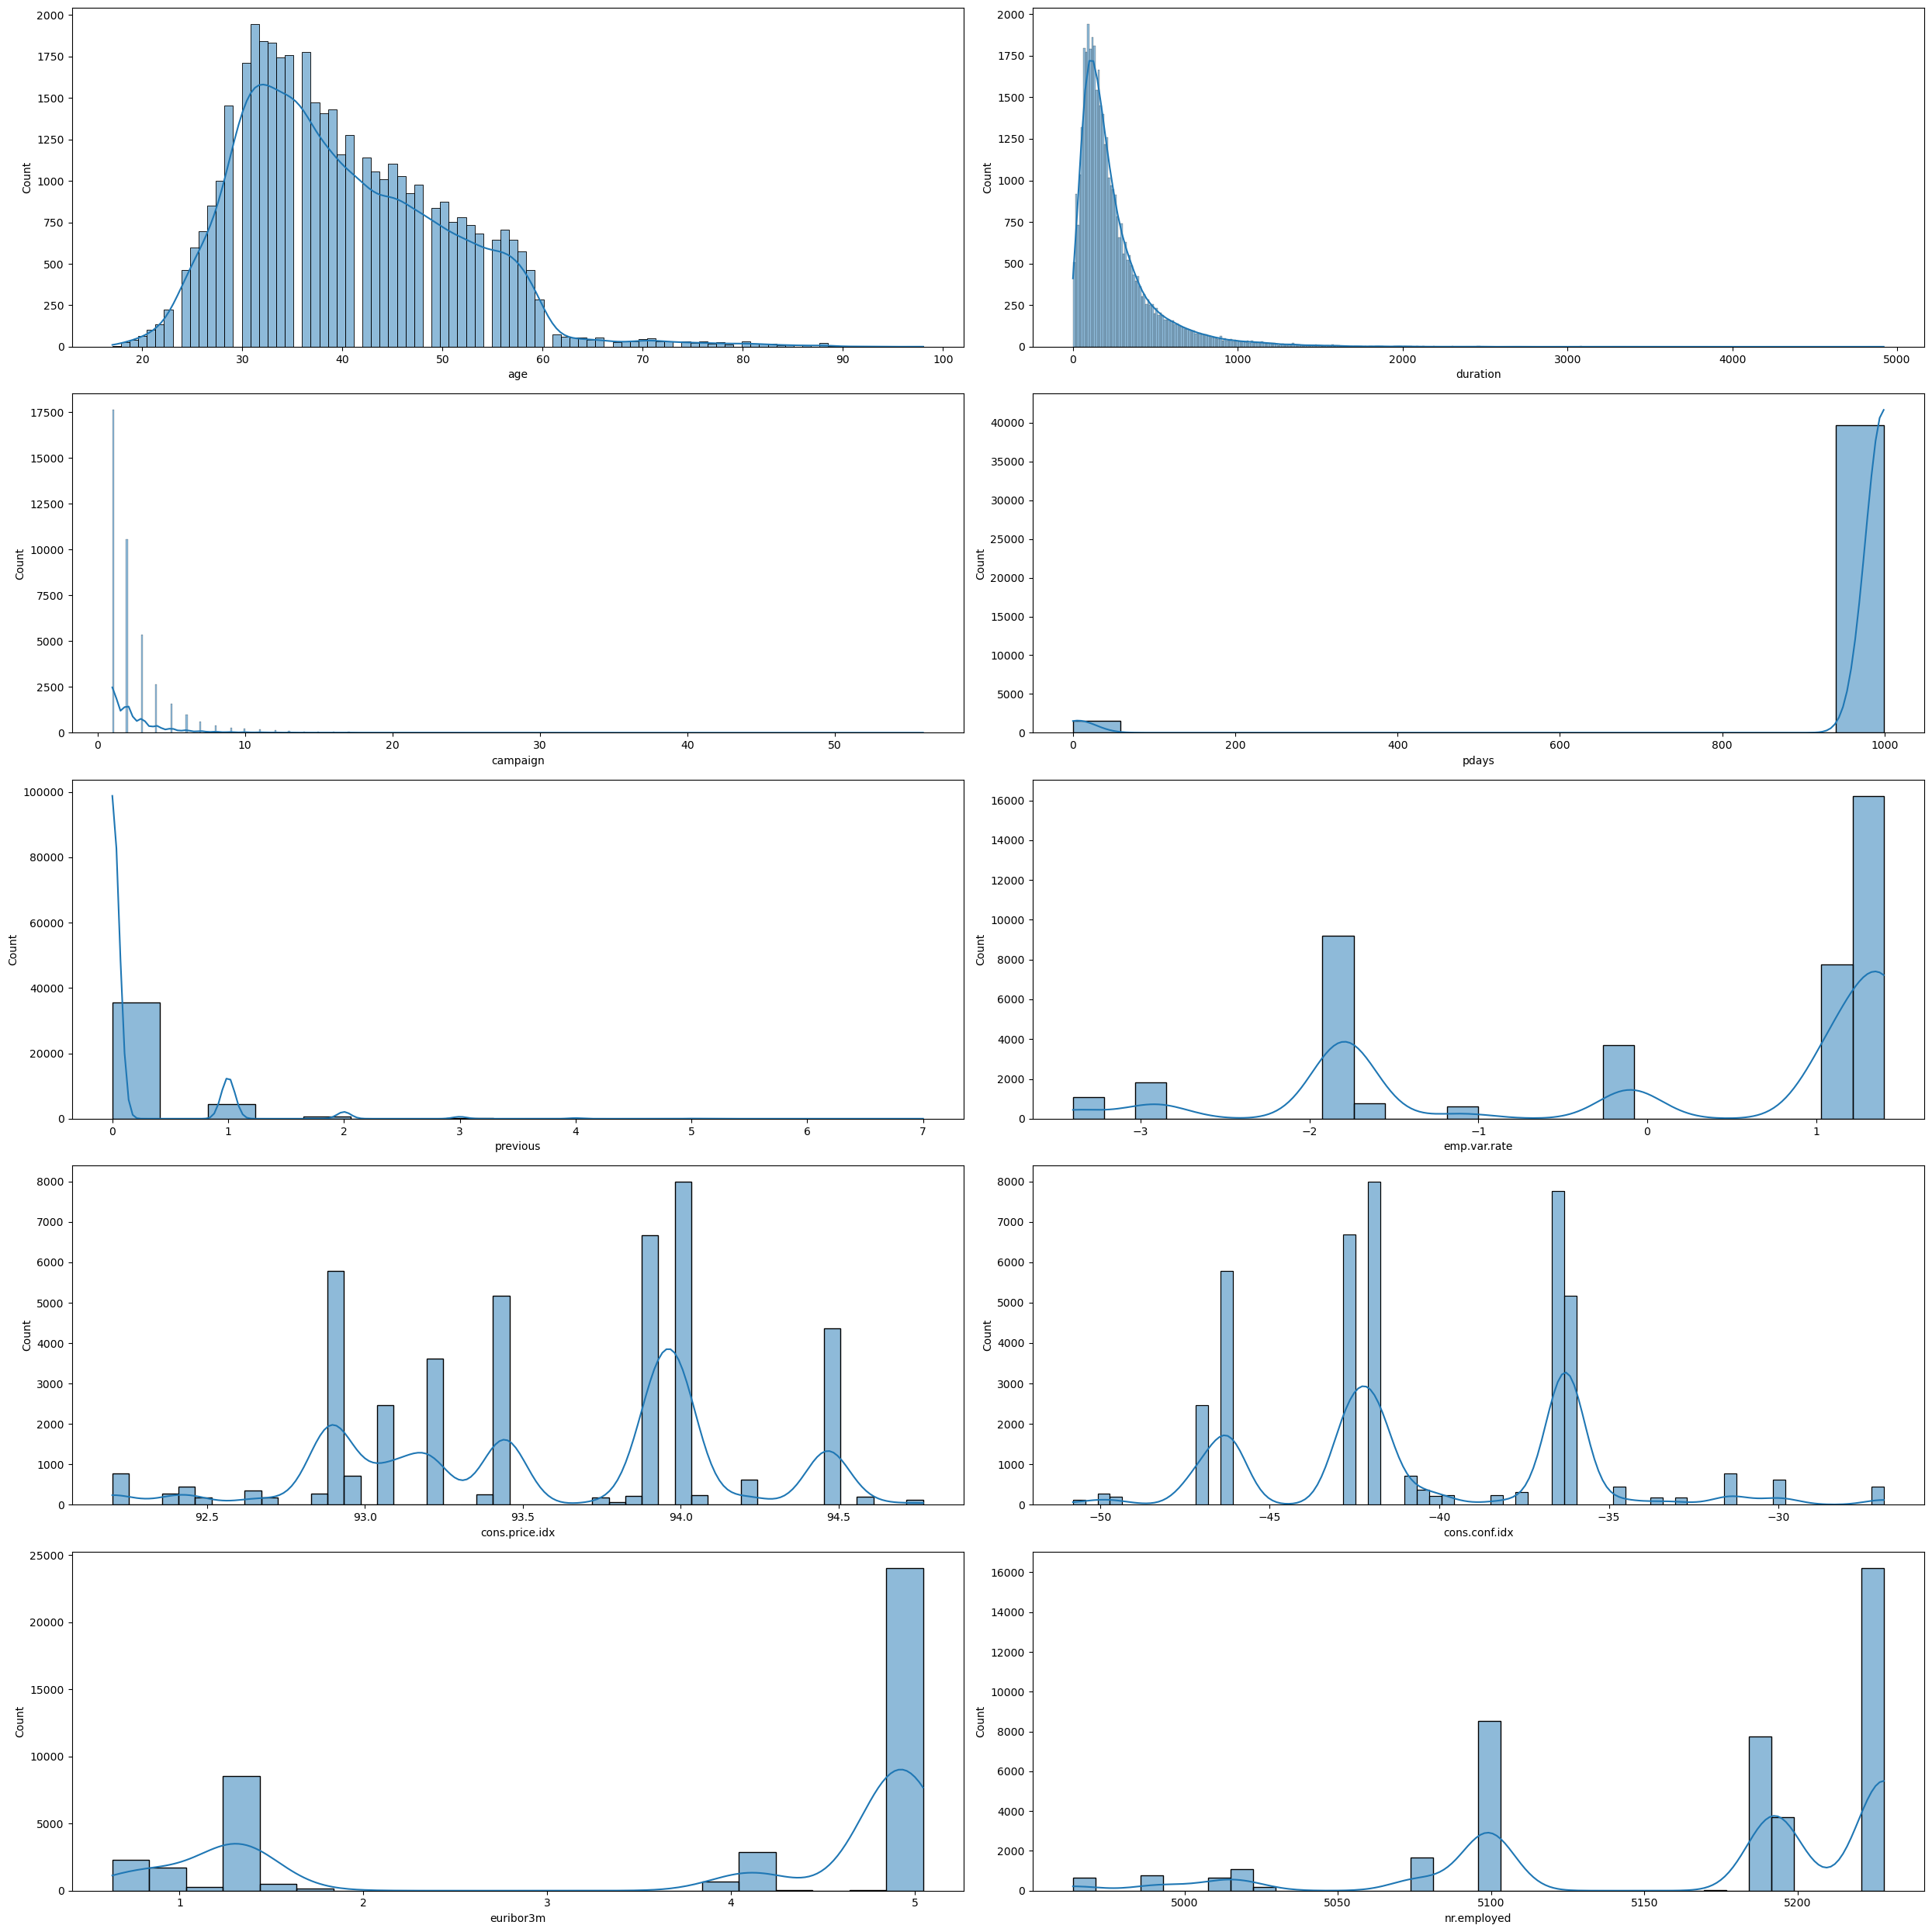

In [22]:
plt.figure(figsize=(25,25),facecolor='white') #Plotting of Numerical columns
plotnumber=1

for columns in df_num:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.histplot(data[columns],kde=True)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Insights for Numerical columns:

1. All the features are scattered over wide range,except 'age' it is heavily right skewed. 
2. The majority of the clients fall into the age group of 30 to 45.

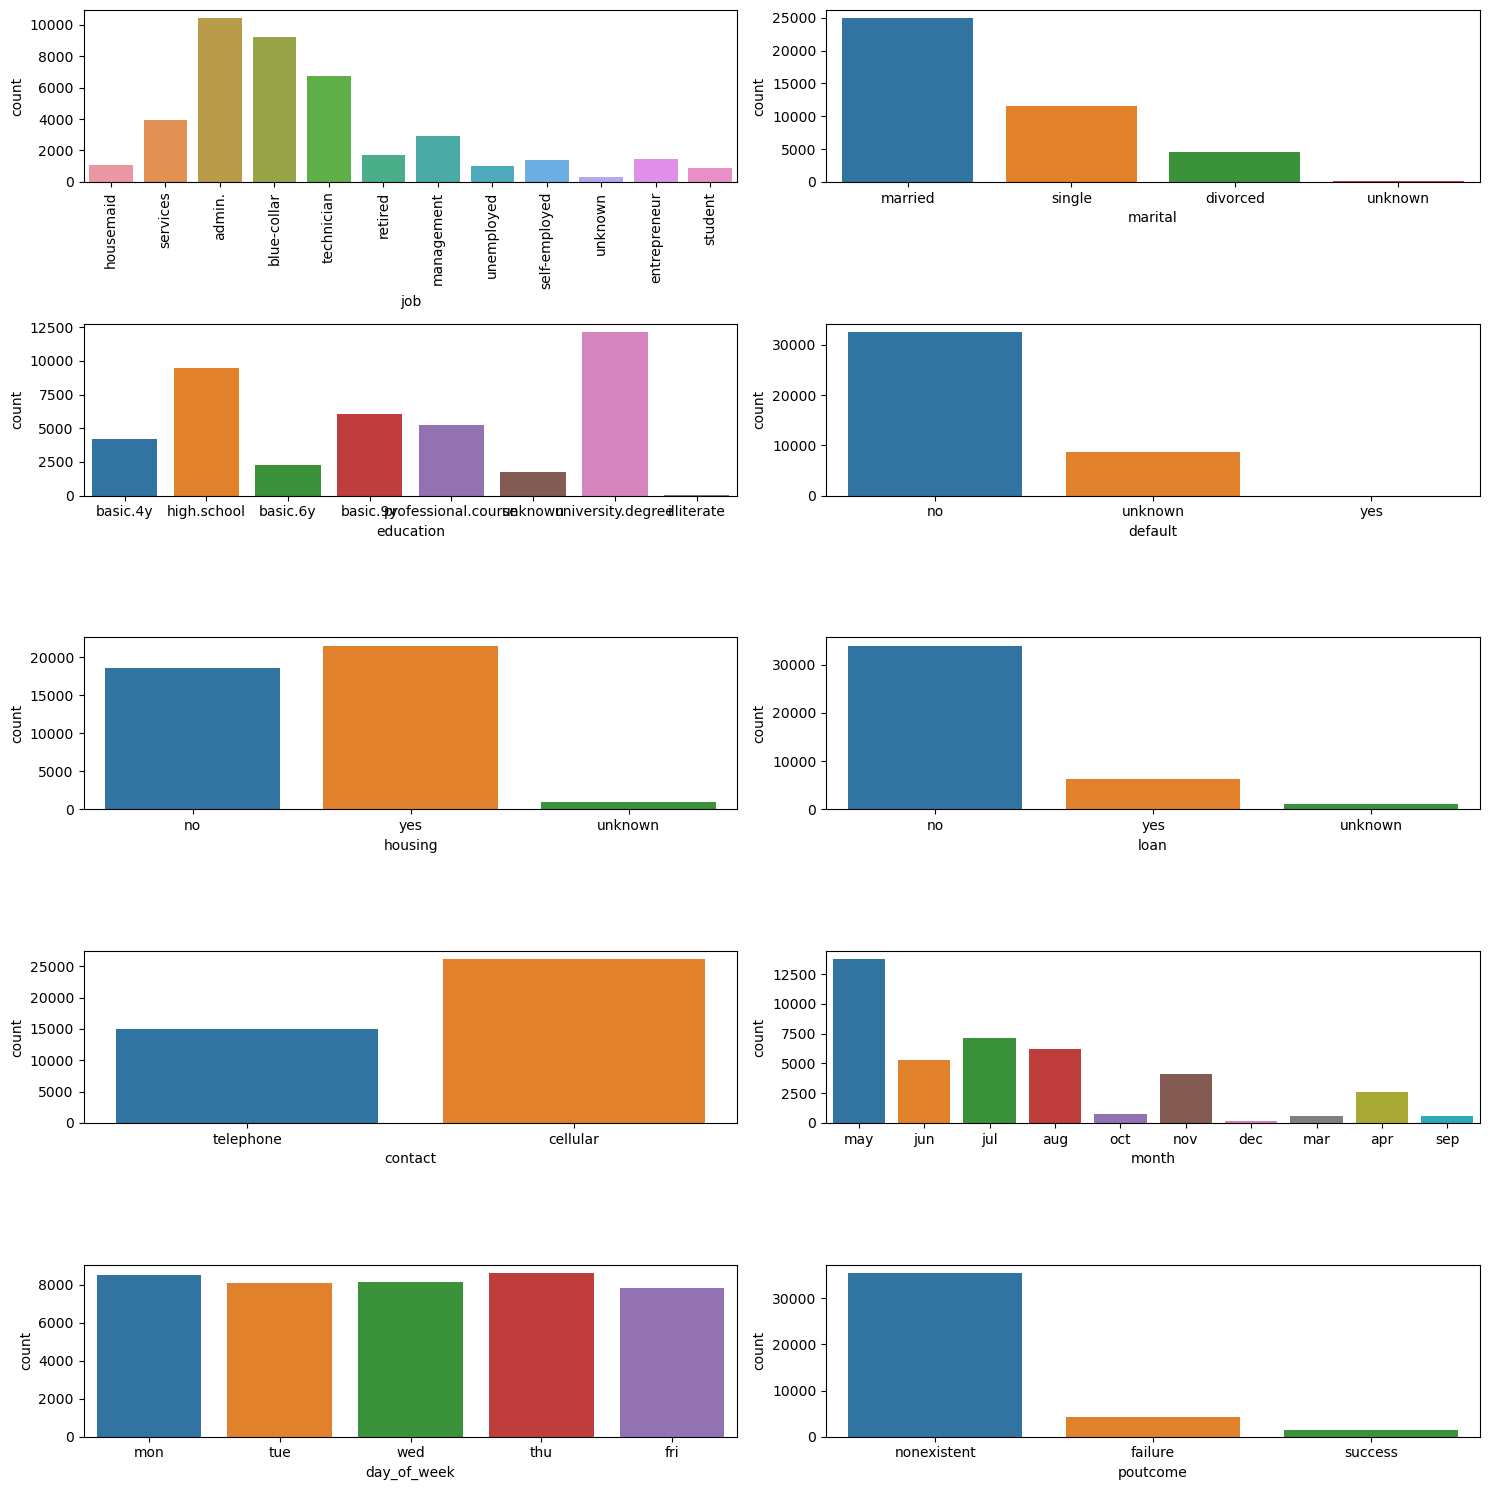

In [23]:
fig, axes = plt.subplots(5,2, figsize=(15,15)) #Plotting of Categorical Columns
for i in range(10):
    sns.countplot(x = df_cat.columns[i], data=df_cat, ax=axes.flat[i])
    
ax1 = axes.flat[0]
labels = ax1.get_xticklabels()
ax1.set_xticklabels(labels = labels, rotation=90)

plt.tight_layout()

# Insights for Categorical columns:

There is High Variance among the values.

# 2. Bivariate Analysis

In [24]:
import plotly.express as px #Contain wide range of plots

In [25]:

cat_plot=pd.DataFrame(data.groupby('marital')['y'].value_counts())
cat_plot['Percentage'] = data.groupby('marital')['y'].value_counts().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum())).values
cat_plot.columns = ['count', 'percentage']
cat_plot.reset_index(level = ['y', 'marital'],inplace=True)
fig=px.bar(cat_plot, x='marital', y=['count'], color = 'y' ,text=cat_plot['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),title="Feature 'marital' vs Target variable")
fig.show()

In [26]:
cat_plot=pd.DataFrame(data.groupby('job')['y'].value_counts())
cat_plot['Percentage'] = data.groupby('job')['y'].value_counts().groupby(level = 0).apply(lambda x: 100 * x / float(x.sum())).values
cat_plot.columns = ['count', 'percentage']
cat_plot.reset_index(level = ['y', 'job'],inplace=True)
fig=px.bar(cat_plot, x='job', y=['count'], color = 'y' ,text=cat_plot['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),title="Feature 'job' vs Target variable")
fig.show()

In [27]:
cat_plot=pd.DataFrame(data.groupby('education')['y'].value_counts())
cat_plot['percentage']=data.groupby('education')['y'].value_counts().groupby(level=0).apply(lambda x: 100 *x/float(x.sum())).values
cat_plot.columns = ['count', 'percentage']
cat_plot.reset_index(level = ['y', 'education'],inplace=True)
fig=px.bar(cat_plot, x='education', y=['count'], color = 'y' ,text=cat_plot['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),title="Feature 'education' vs Target variable")
fig.show()

In [28]:
cat_plot=pd.DataFrame(data.groupby('default')['y'].value_counts())
cat_plot['percentage']=data.groupby('default')['y'].value_counts().groupby(level=0).apply(lambda x: 100 *x/float(x.sum())).values
cat_plot.columns = ['count', 'percentage']
cat_plot.reset_index(level = ['y', 'default'],inplace=True)
fig=px.bar(cat_plot, x='default', y=['count'], color = 'y' ,text=cat_plot['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),title="Feature 'default' vs Target variable")
fig.show()

In [29]:
cat_plot=pd.DataFrame(data.groupby('housing')['y'].value_counts())
cat_plot['percentage']=data.groupby('housing')['y'].value_counts().groupby(level=0).apply(lambda x: 100 *x/float(x.sum())).values
cat_plot.columns = ['count', 'percentage']
cat_plot.reset_index(level = ['y', 'housing'],inplace=True)
fig=px.bar(cat_plot, x='housing', y=['count'], color = 'y' ,text=cat_plot['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),title="Feature 'housing' vs Target variable")
fig.show()

In [30]:
cat_plot=pd.DataFrame(data.groupby('loan')['y'].value_counts())
cat_plot['percentage']=data.groupby('loan')['y'].value_counts().groupby(level=0).apply(lambda x: 100 *x/float(x.sum())).values
cat_plot.columns = ['count', 'percentage']
cat_plot.reset_index(level = ['y', 'loan'],inplace=True)
fig=px.bar(cat_plot, x='loan', y=['count'], color = 'y' ,text=cat_plot['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),title="Feature 'loan' vs Target variable")
fig.show()

In [31]:
cat_plot=pd.DataFrame(data.groupby('contact')['y'].value_counts())
cat_plot['percentage']=data.groupby('contact')['y'].value_counts().groupby(level=0).apply(lambda x: 100 *x/float(x.sum())).values
cat_plot.columns = ['count', 'percentage']
cat_plot.reset_index(level = ['y', 'contact'],inplace=True)
fig=px.bar(cat_plot, x='contact', y=['count'], color = 'y' ,text=cat_plot['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),title="Feature 'contact' vs Target variable")
fig.show()

In [32]:

cat_plot=pd.DataFrame(data.groupby('month')['y'].value_counts())
cat_plot['percentage']=data.groupby('month')['y'].value_counts().groupby(level=0).apply(lambda x: 100 *x/float(x.sum())).values
cat_plot.columns = ['count', 'percentage']
cat_plot.reset_index(level = ['y', 'month'],inplace=True)
fig=px.bar(cat_plot, x='month', y=['count'], color = 'y' ,text=cat_plot['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),title="Feature 'month' vs Target variable")
fig.show()

In [33]:
cat_plot=pd.DataFrame(data.groupby('poutcome')['y'].value_counts())
cat_plot['percentage']=data.groupby('poutcome')['y'].value_counts().groupby(level=0).apply(lambda x: 100 *x/float(x.sum())).values
cat_plot.columns = ['count', 'percentage']
cat_plot.reset_index(level = ['y', 'poutcome'],inplace=True)
fig=px.bar(cat_plot, x='poutcome', y=['count'], color = 'y' ,text=cat_plot['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),title="Feature 'poutcome' vs Target variable")
fig.show()

In [34]:
cat_plot=pd.DataFrame(data.groupby('day_of_week')['y'].value_counts())
cat_plot['percentage']=data.groupby('day_of_week')['y'].value_counts().groupby(level=0).apply(lambda x: 100 *x/float(x.sum())).values
cat_plot.columns = ['count', 'percentage']
cat_plot.reset_index(level = ['y', 'day_of_week'],inplace=True)
fig=px.bar(cat_plot, x='day_of_week', y=['count'], color = 'y' ,text=cat_plot['percentage'].apply(lambda x: '{0:1.2f}%'.format(x)),title="Feature 'day_of_week' vs Target variable")
fig.show()

# Insights for Categorical columns:

1. We can see that the data is highly imbalanced.
2. Color blue represents people who are not interested in taking the loans.
3. Color Orange represents people who are interested in taking the loan.
4. People who are single taking the deposits.
5. People employed in blue_Collar aren't much interested in taking the loans and people working as housemaids are taking the deposits.
6. In the month of May, though number of records are high, much subscriptions aren't observed.
7. Probability of a client, with standing loan, subscribing for a term deposit seems to be low.


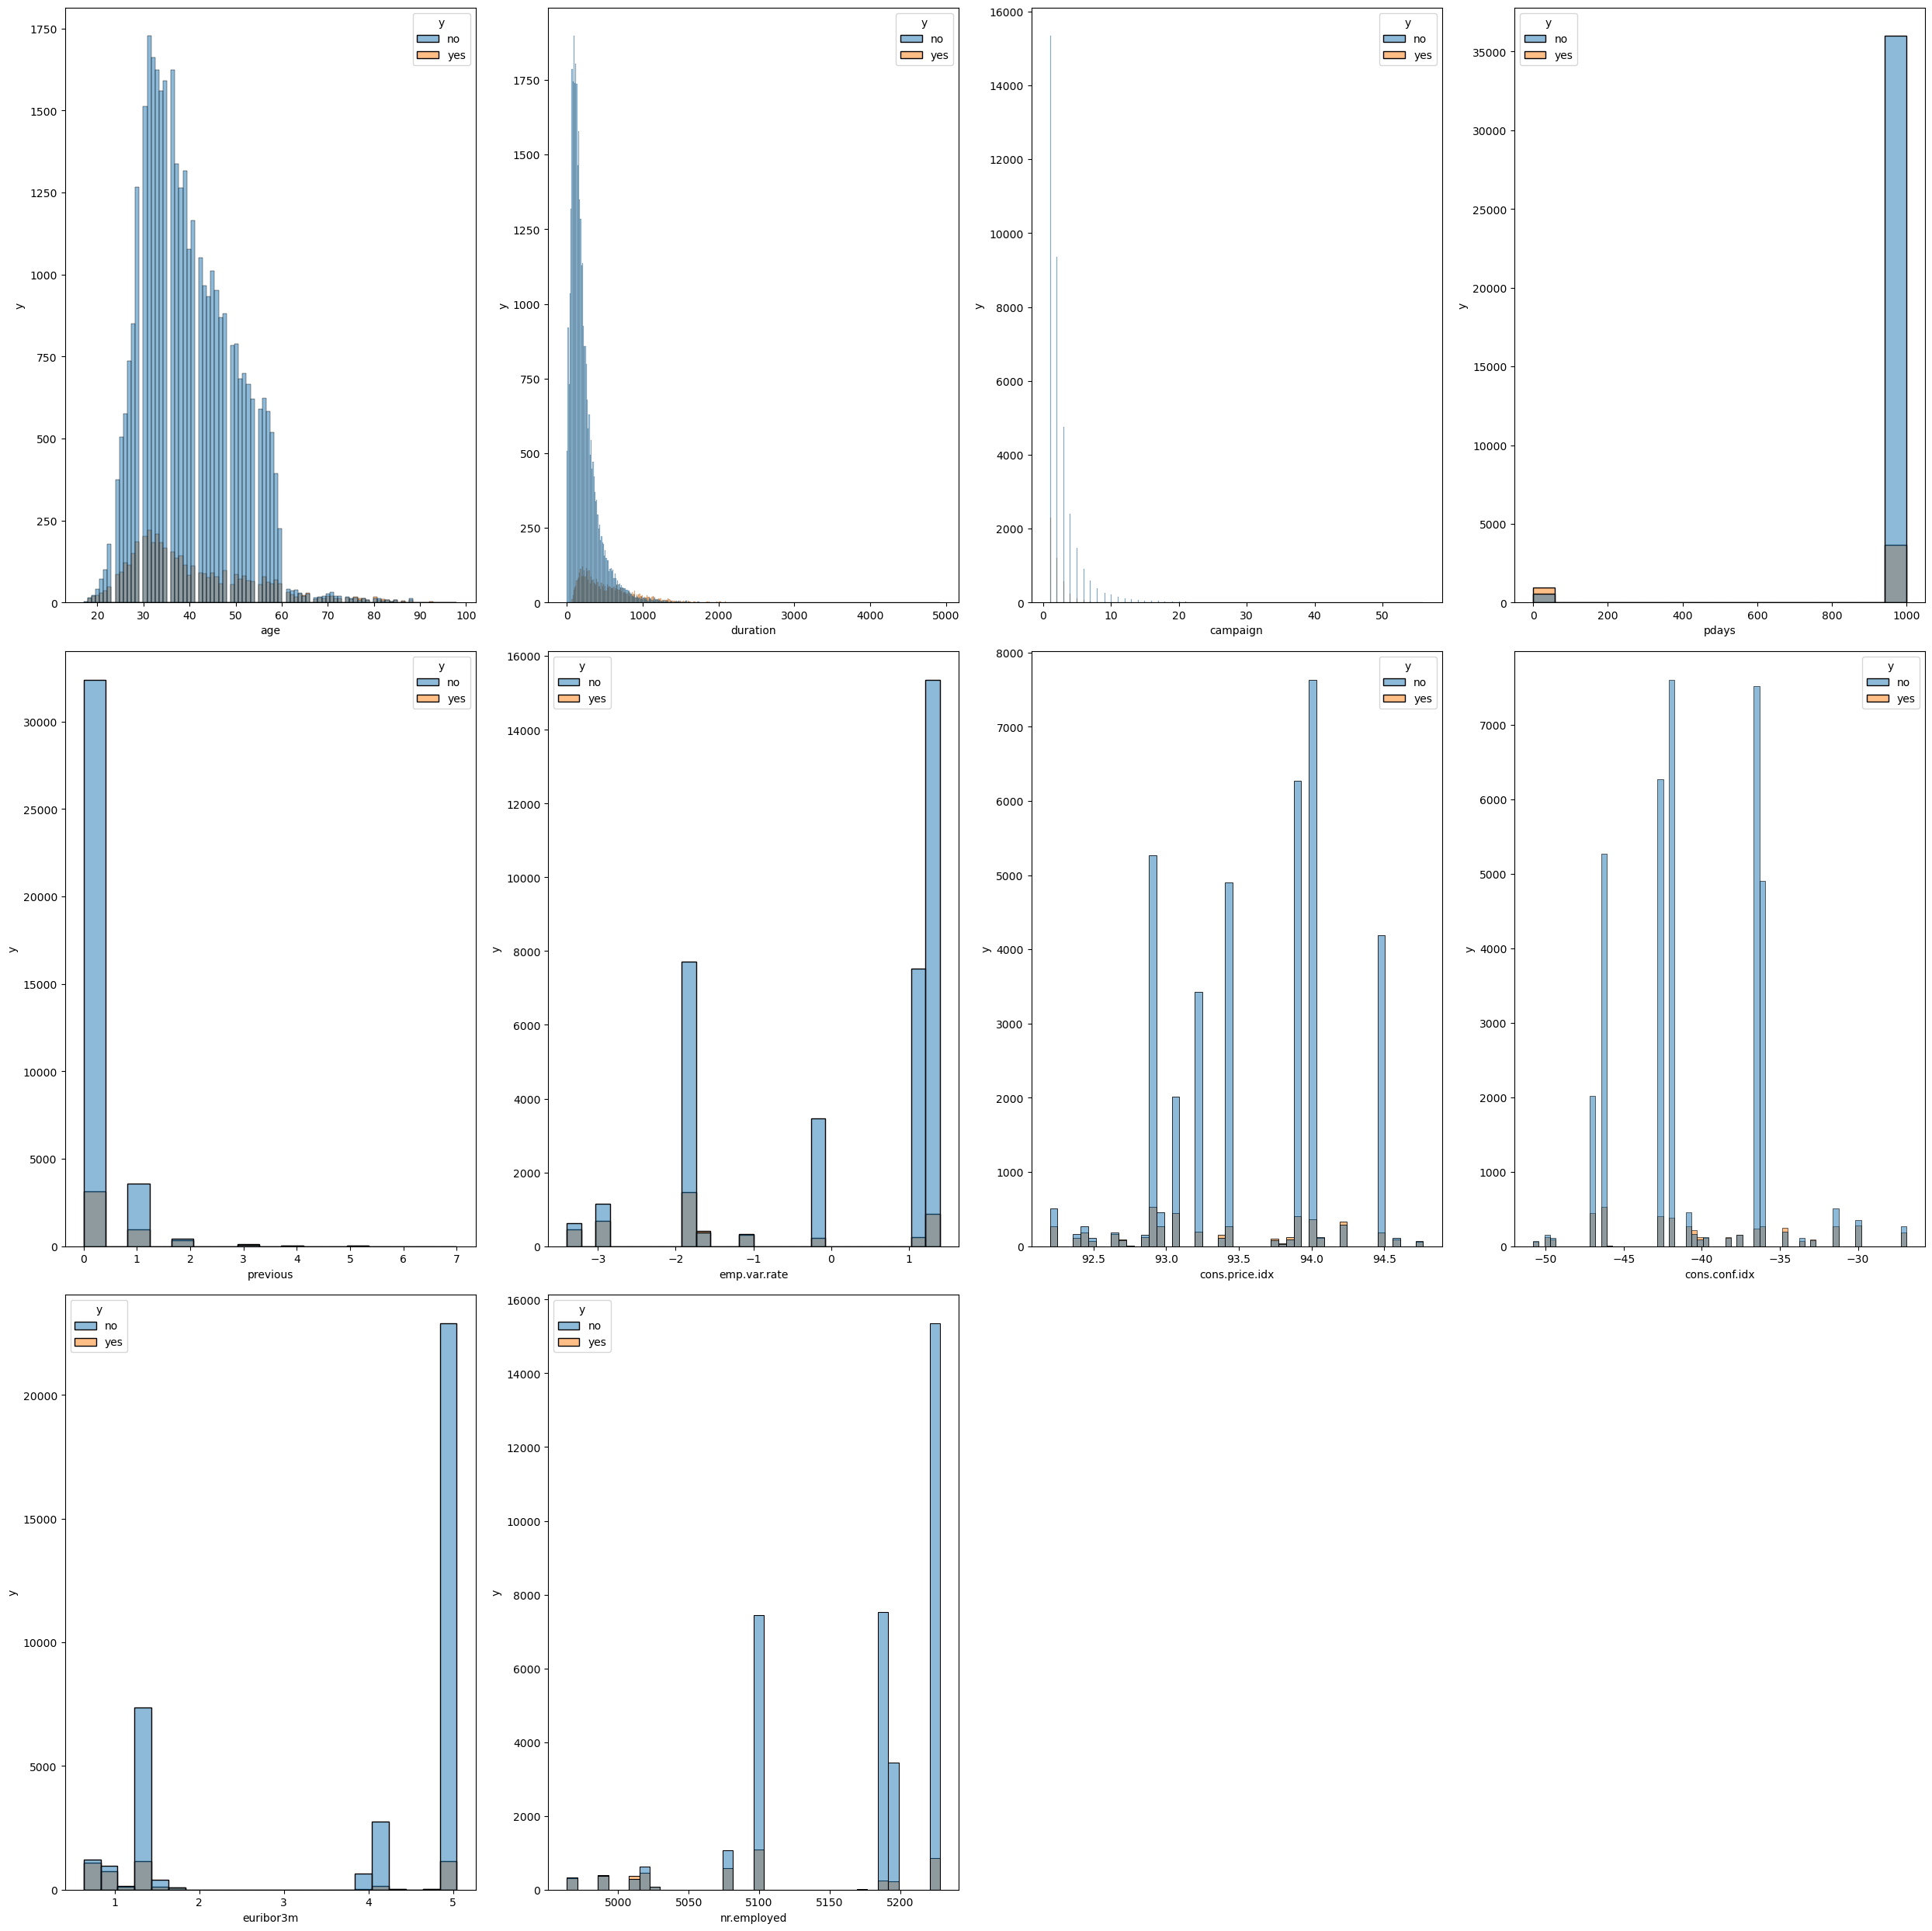

In [35]:
# For Numerical columns
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1

for columns in df_num:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.histplot(x=data[columns],hue=data['y'])
        plt.xlabel(columns,fontsize=10)
        plt.ylabel('y',fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Insights for Numerical columns:

1. Features in comparison with the target outcome 'Yes' have low peakedness.
2. On the other hand, features when compared to the target outcome 'No' are leptokurtic, denoting large number of outliers.

# 3. Multivariate Analysis

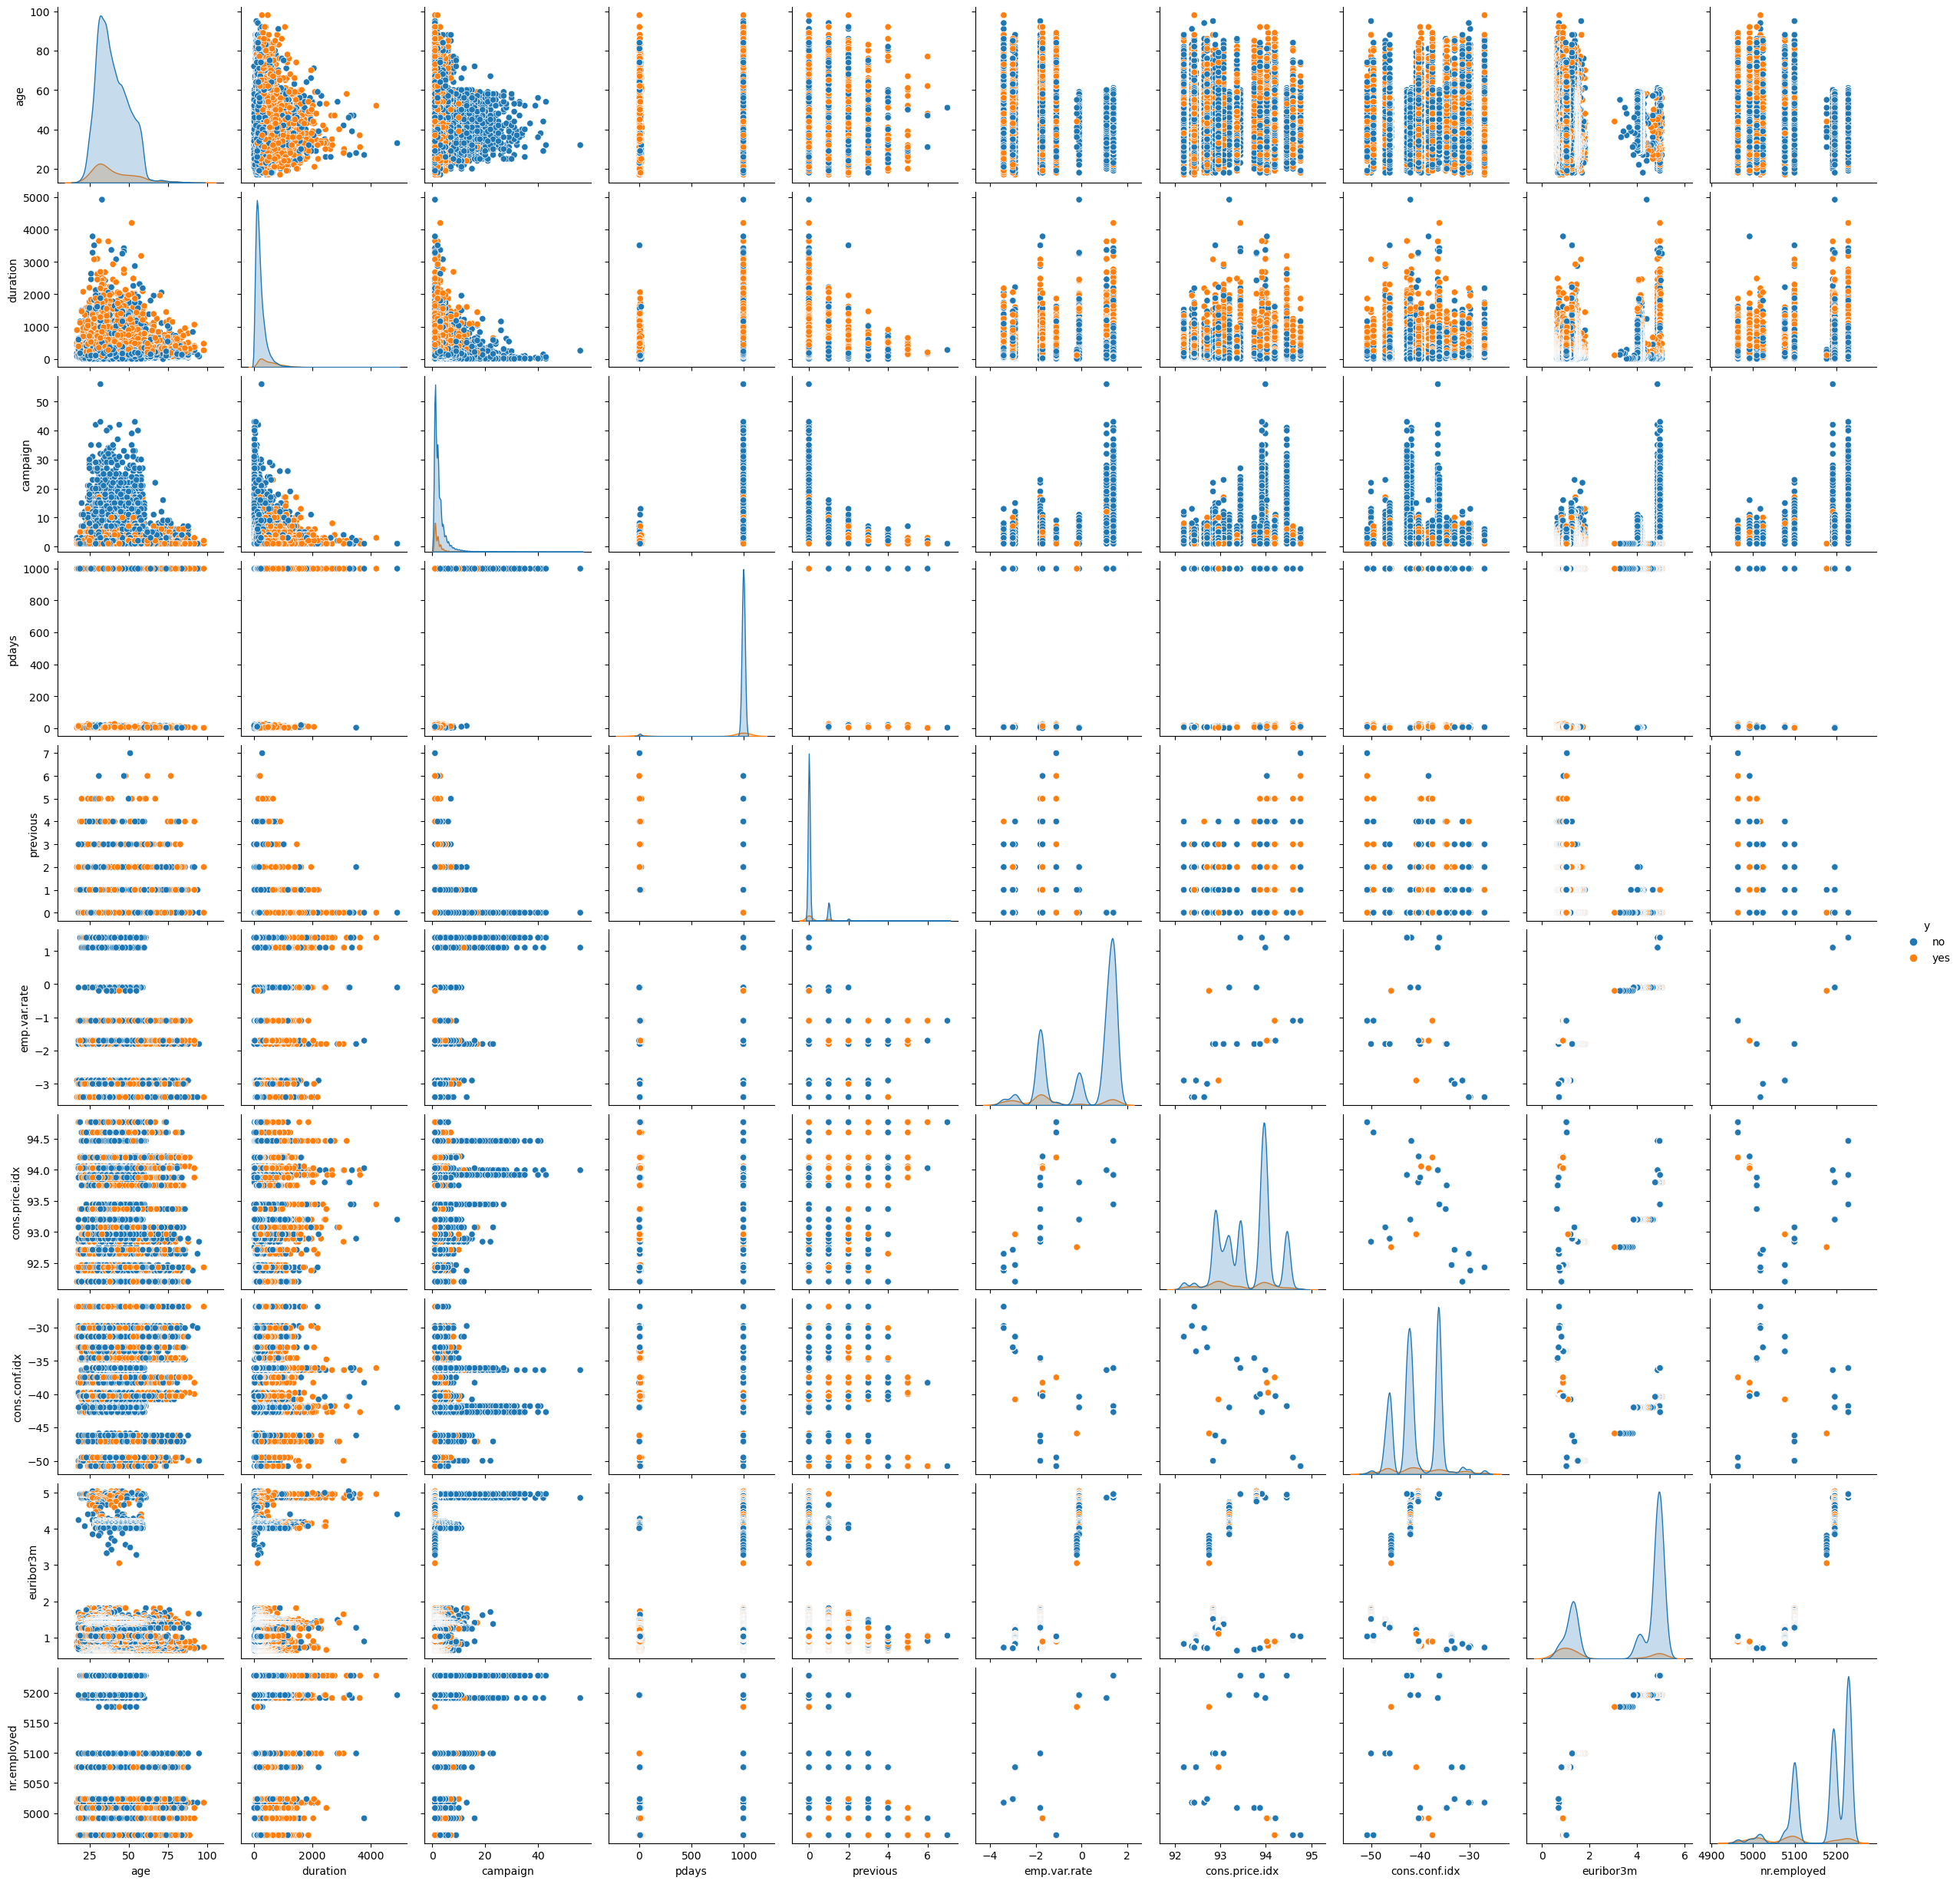

In [36]:
sns.pairplot(data,hue='y')

# Insights:

1. None of the columns show any significant correlation with each other.
2. A fair uniform distribution of outcomes for most columns is observed.

# ! HANDLING OUTLIERS

In [37]:
df_num

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  
0              -36.4      4.857       5191.0  
1              -36.4      4.857       5191.0  
2              -36.4      4.857       5191.0  
3              -36.4      4.857       5191.0  
4              -36.4      4.857       5191.0  
...              ...        ...          ...  
41183          -50.8      1.028       4963.6  
41184          -50.8      1.028       4963.6  
41185          -50.8      1.028       4963.6  
41186          -50.8      1.028       4963.6  
41187          -50.8      1.028       4963.6  

[41176 rows x 10 columns]

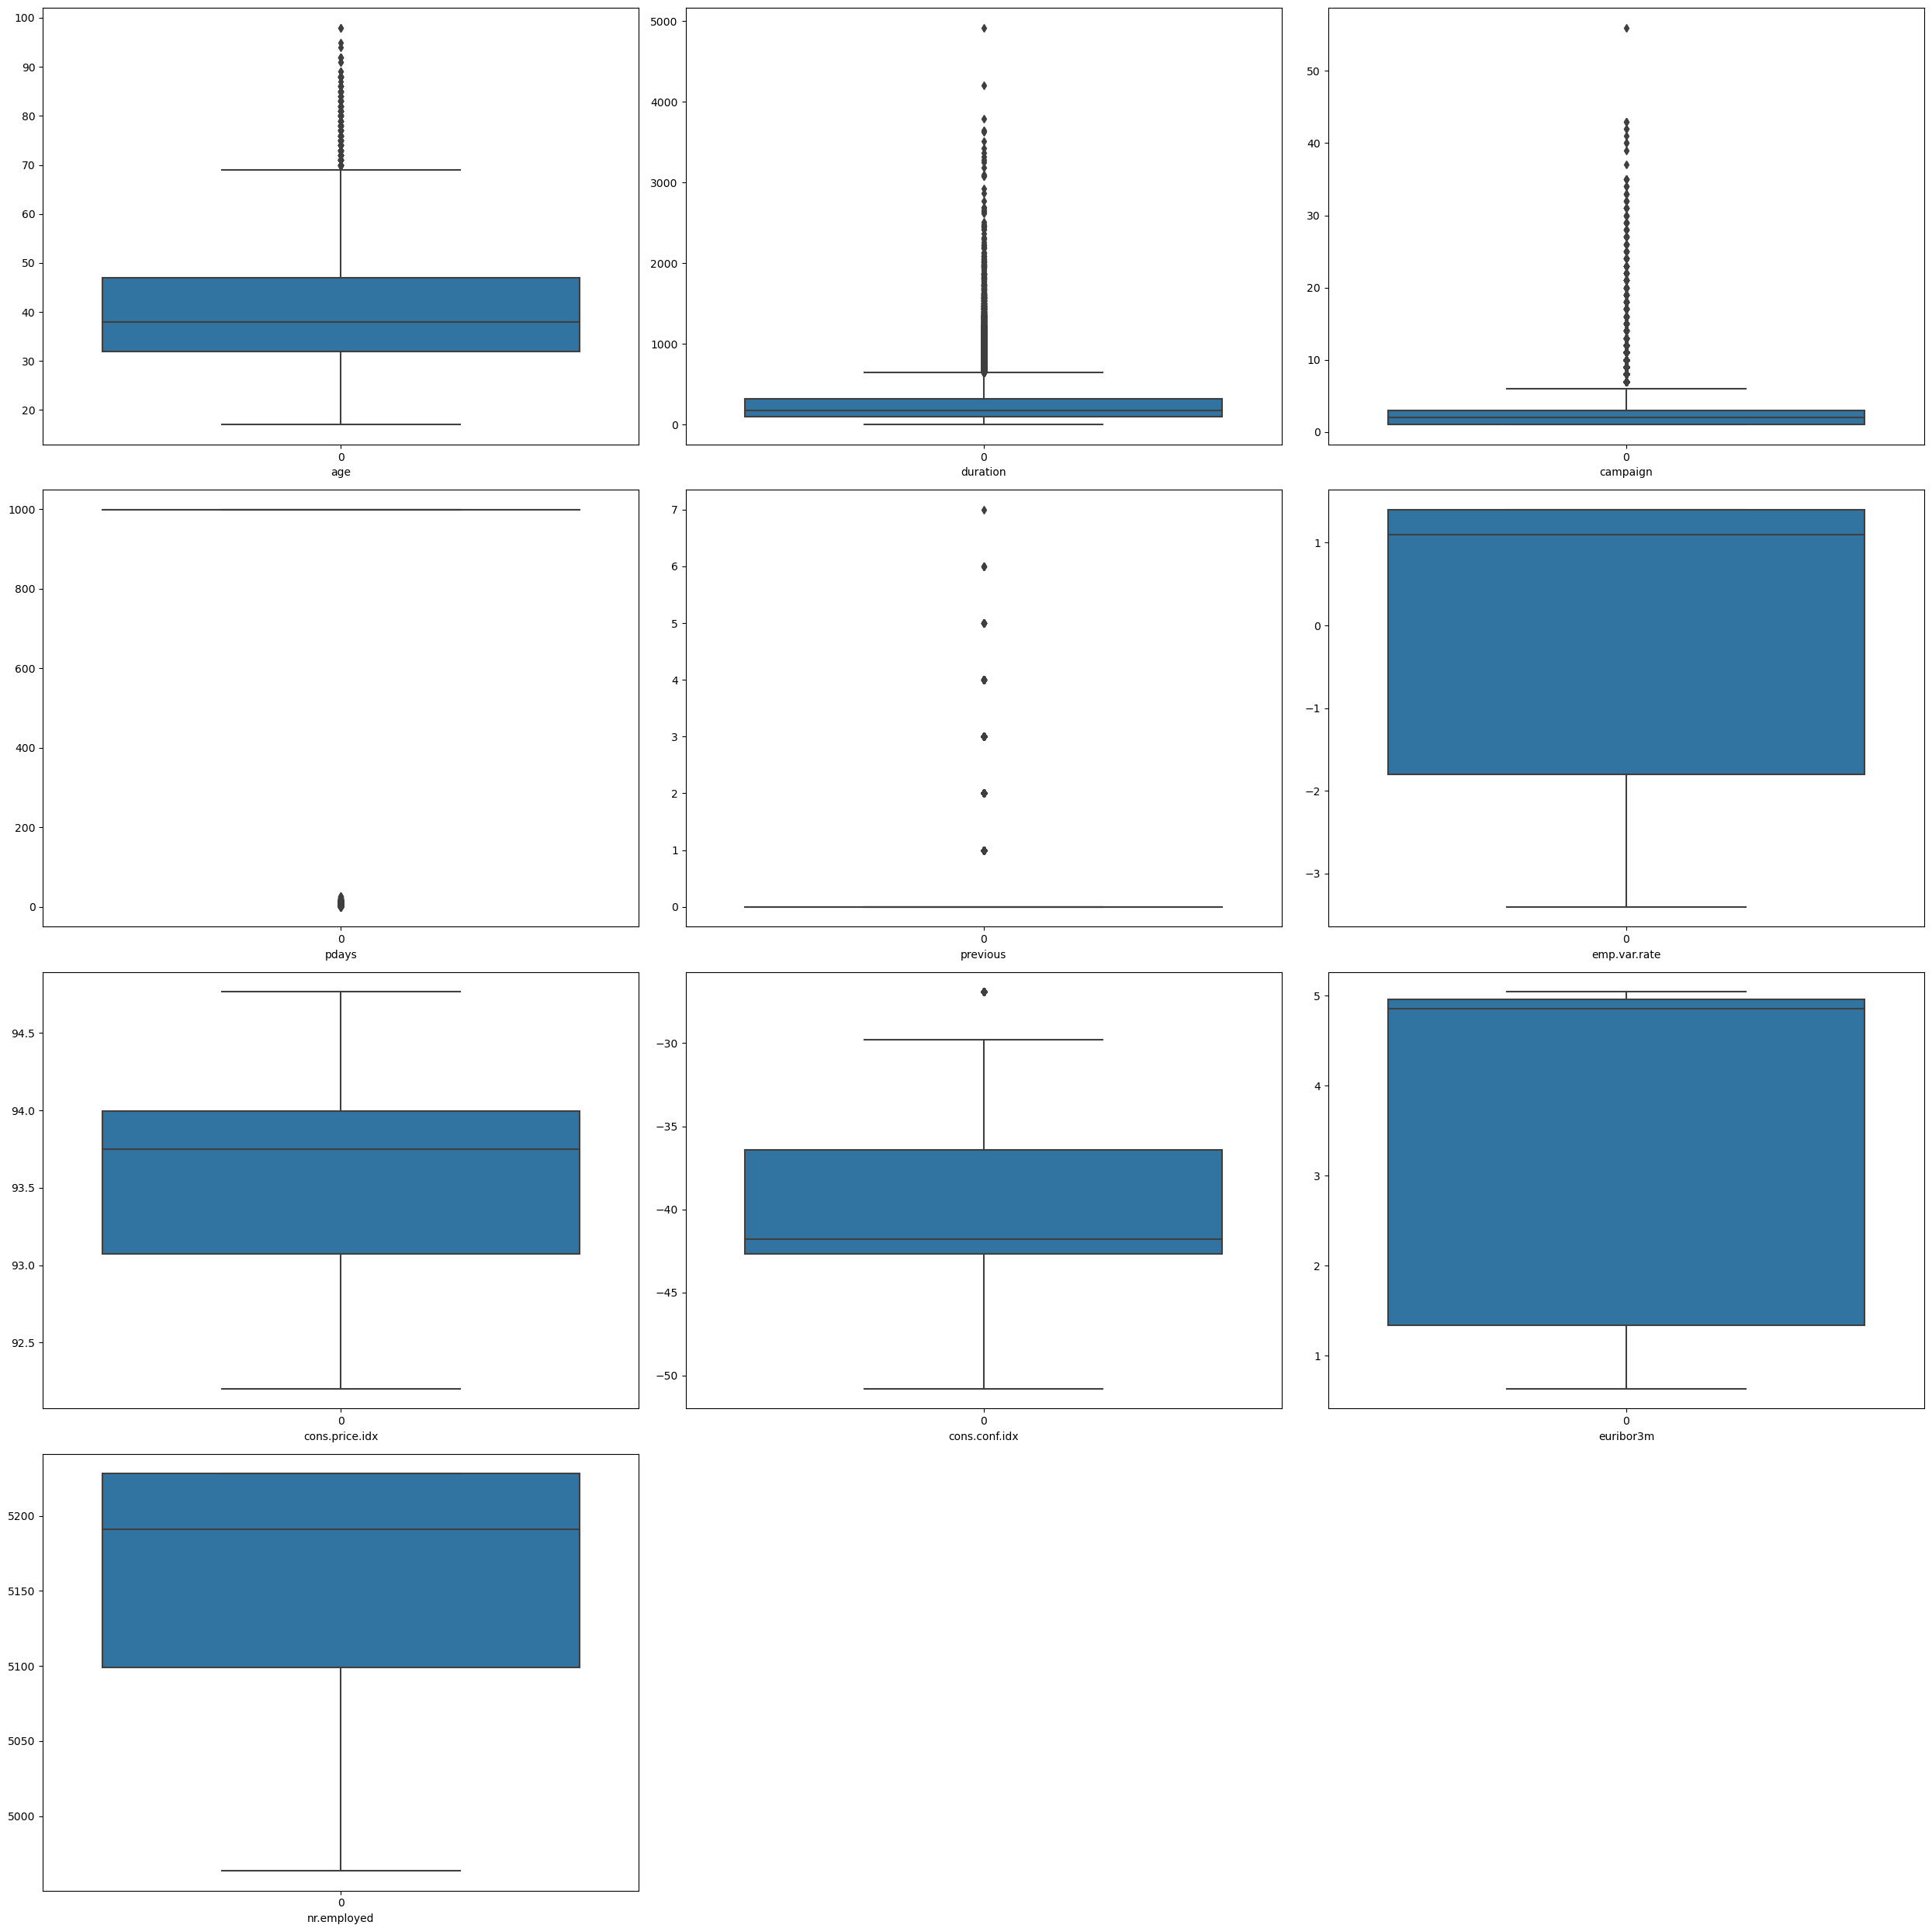

In [38]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1

for columns in df_num:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[columns])
        plt.xlabel(columns,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

Outliers are observed in 'age','duration','campaign','pdays','previous'.

# Removing Outliers:-

# Age:

In [39]:
q1=data['age'].quantile(0.25)
q1

32.0

In [40]:
q3=data['age'].quantile(0.75)
q3

47.0

In [41]:
iqr=q3-q1
iqr

15.0

In [42]:
lower_limit=q1-1.5*iqr
lower_limit

9.5

In [43]:
upper_limit=q3+1.5*iqr
upper_limit

69.5

In [44]:
data.loc[data['age']<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]

In [45]:
data.loc[data['age']>upper_limit]

age      job   marital            education  default housing loan  \
27713   70  retired  divorced             basic.4y       no     yes   no   
27757   76  retired   married    university.degree       no      no  yes   
27780   73  retired   married    university.degree       no     yes   no   
27800   88  retired  divorced             basic.4y       no     yes   no   
27802   88  retired  divorced             basic.4y       no      no   no   
...    ...      ...       ...                  ...      ...     ...  ...   
40986   84  retired  divorced             basic.4y  unknown     yes  yes   
40996   81  retired   married             basic.4y       no     yes   no   
41004   80  retired   married  professional.course       no     yes   no   
41183   73  retired   married  professional.course       no     yes   no   
41187   74  retired   married  professional.course       no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
27713  cellular   mar         mon  ...         3    999         0   
27757  cellular   mar         thu  ...         9    999         0   
27780  cellular   mar         tue  ...         1    999         1   
27800  cellular   mar         wed  ...         1    999         0   
27802  cellular   mar         wed  ...         2    999         0   
...         ...   ...         ...  ...       ...    ...       ...   
40986  cellular   oct         mon  ...         4      3         1   
40996  cellular   oct         wed  ...         1    999         2   
41004  cellular   oct         thu  ...         1    999         1   
41183  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
27713  nonexistent         -1.8          92.843          -50.0      1.811   
27757  nonexistent         -1.8          92.843          -50.0      1.757   
27780      failure         -1.8          92.843          -50.0      1.687   
27800  nonexistent         -1.8          92.843          -50.0      1.663   
27802  nonexistent         -1.8          92.843          -50.0      1.663   
...            ...          ...             ...            ...        ...   
40986      success         -1.1          94.601          -49.5      1.000   
40996      failure         -1.1          94.601          -49.5      1.016   
41004      failure         -1.1          94.601          -49.5      1.025   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
27713       5099.1  yes  
27757       5099.1   no  
27780       5099.1   no  
27800       5099.1   no  
27802       5099.1  yes  
...            ...  ...  
40986       4963.6   no  
40996       4963.6  yes  
41004       4963.6  yes  
41183       4963.6  yes  
41187       4963.6   no  

[468 rows x 21 columns]

In [46]:
data.loc[data['age']>upper_limit,'age']=data['age'].median()

<Axes: >

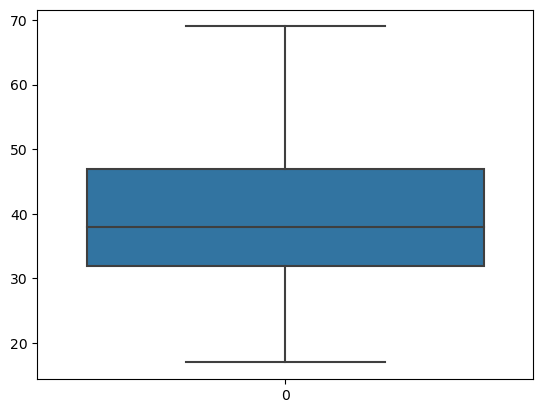

In [47]:
sns.boxplot(data['age'])

# Campaign:

In [48]:
q1=data['campaign'].quantile(0.25)
q1

1.0

In [49]:
q3=data['campaign'].quantile(0.75)
q3

3.0

In [50]:
iqr=q3-q1
iqr

2.0

In [51]:
lower_limit=q1-1.5*iqr
lower_limit

-2.0

In [52]:
upper_limit=q3+1.5*iqr
upper_limit

6.0

In [53]:
data.loc[data['campaign']<lower_limit]

Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]

In [54]:
data.loc[data['campaign']>upper_limit]

age           job   marital            education  default housing loan  \
887     54        admin.   married    university.degree       no      no   no   
1043    41    technician    single    university.degree  unknown      no   no   
1094    40    technician   married  professional.course       no     yes   no   
1097    51   blue-collar   married             basic.4y  unknown     yes   no   
1230    48   blue-collar  divorced             basic.4y       no      no   no   
...    ...           ...       ...                  ...      ...     ...  ...   
40611   38       retired   married             basic.9y       no      no   no   
40631   38       retired   married             basic.4y       no     yes   no   
40698   29    technician    single  professional.course       no     yes   no   
40821   33    technician    single  professional.course       no     yes   no   
40993   50  entrepreneur  divorced    university.degree       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
887    telephone   may         wed  ...         7    999         0   
1043   telephone   may         wed  ...         8    999         0   
1094   telephone   may         wed  ...         8    999         0   
1097   telephone   may         wed  ...         7    999         0   
1230   telephone   may         thu  ...         7    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
40611  telephone   sep         fri  ...         9    999         1   
40631   cellular   sep         mon  ...         7    999         0   
40698   cellular   sep         mon  ...         7      3         5   
40821   cellular   sep         fri  ...         9    999         2   
40993  telephone   oct         tue  ...         7     11         2   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
887    nonexistent          1.1          93.994          -36.4      4.856   
1043   nonexistent          1.1          93.994          -36.4      4.856   
1094   nonexistent          1.1          93.994          -36.4      4.856   
1097   nonexistent          1.1          93.994          -36.4      4.856   
1230   nonexistent          1.1          93.994          -36.4      4.855   
...            ...          ...             ...            ...        ...   
40611      failure         -1.1          94.199          -37.5      0.883   
40631  nonexistent         -1.1          94.199          -37.5      0.882   
40698      success         -1.1          94.199          -37.5      0.879   
40821      failure         -1.1          94.199          -37.5      0.879   
40993      success         -1.1          94.601          -49.5      1.008   

       nr.employed    y  
887         5191.0   no  
1043        5191.0   no  
1094        5191.0   no  
1097        5191.0   no  
1230        5191.0   no  
...            ...  ...  
40611       4963.6   no  
40631       4963.6   no  
40698       4963.6   no  
40821       4963.6   no  
40993       4963.6  yes  

[2406 rows x 21 columns]

In [55]:
data.loc[data['campaign']>upper_limit,'campaign']=data['campaign'].median()

<Axes: >

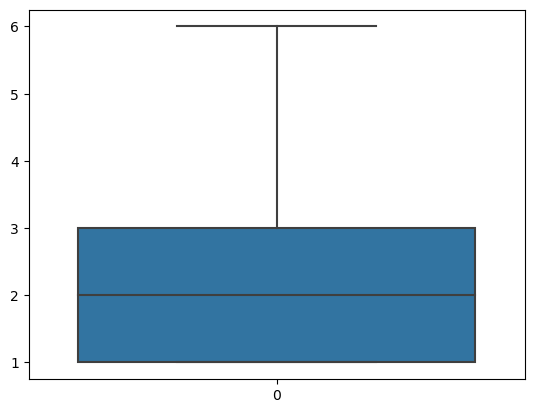

In [56]:
sns.boxplot(data['campaign'])

# Pdays:

In [57]:
q1=data['pdays'].quantile(0.25)
q1

999.0

In [58]:
q3=data['pdays'].quantile(0.75)
q3

999.0

In [59]:
iqr=q3-q1
iqr

0.0

# Previous:

In [60]:
q1=data['previous'].quantile(0.25)
q1

0.0

In [61]:
q3=data['previous'].quantile(0.75)
q3

0.0

In [62]:
iqr=q3-q1
iqr

0.0

# ! LABEL ENCODING

In [63]:
for i in df_cat:
    print(i,data[i].unique())
    print(i,data[i].value_counts())
    print('#'*40)

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
job admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
########################################
marital ['married' 'single' 'divorced' 'unknown']
marital married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
########################################
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
education university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y              

In [64]:
for col in df_cat.columns:
    print("Feature:",col)
    print(data[col].value_counts(normalize=True).mul(100).round(2).astype(str)+"%","\n")

Feature: job
admin.            25.3%
blue-collar      22.47%
technician       16.37%
services          9.63%
management         7.1%
retired           4.17%
entrepreneur      3.54%
self-employed     3.45%
housemaid         2.57%
unemployed        2.46%
student           2.13%
unknown            0.8%
Name: job, dtype: object 

Feature: marital
married     60.52%
single      28.08%
divorced     11.2%
unknown      0.19%
Name: marital, dtype: object 

Feature: education
university.degree      29.54%
high.school             23.1%
basic.9y               14.68%
professional.course    12.73%
basic.4y               10.14%
basic.6y                5.56%
unknown                  4.2%
illiterate              0.04%
Name: education, dtype: object 

Feature: default
no         79.12%
unknown    20.88%
yes         0.01%
Name: default, dtype: object 

Feature: housing
yes        52.39%
no         45.21%
unknown      2.4%
Name: housing, dtype: object 

Feature: loan
no         82.42%
yes        15.17%
un

In [65]:
data['job'].replace('unknown',data['job'].mode()[0],inplace=True)
data['education'].replace('unknown',data['education'].mode()[0],inplace=True)

In [66]:
data['job'].value_counts()

admin.           10749
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [67]:
data['education'].value_counts()

university.degree      13894
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
illiterate                18
Name: education, dtype: int64

In [68]:
data.job=data.job.map({'admin.':10,'blue-collar':9,'technician':8,'services':7,'management':6,'retired':5,'entrepreneur':4,'self-employed':3,'housemaid':2,'unemployed':1,'student':0})
data.head(3)

age  job  marital    education  default housing loan    contact month  \
0   56    2  married     basic.4y       no      no   no  telephone   may   
1   57    7  married  high.school  unknown      no   no  telephone   may   
2   37    7  married  high.school       no     yes   no  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]

In [69]:
data.marital=data.marital.map({'married':3,'single':2,'divorced':1,'unknown':0})
data.head(3)

age  job  marital    education  default housing loan    contact month  \
0   56    2        3     basic.4y       no      no   no  telephone   may   
1   57    7        3  high.school  unknown      no   no  telephone   may   
2   37    7        3  high.school       no     yes   no  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]

In [70]:
data.education=data.education.map({'university.degree':6,'high.school':5,'basic.9y':4,'professional.course':3,'basic.4y':2,'basic.6y':1,'illiterate':0})
data.head(3)

age  job  marital  education  default housing loan    contact month  \
0   56    2        3          2       no      no   no  telephone   may   
1   57    7        3          5  unknown      no   no  telephone   may   
2   37    7        3          5       no     yes   no  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]

In [71]:
data.default=data.default.map({'no':2,'unknown':1,'yes':0})
data.head(3)

age  job  marital  education  default housing loan    contact month  \
0   56    2        3          2        2      no   no  telephone   may   
1   57    7        3          5        1      no   no  telephone   may   
2   37    7        3          5        2     yes   no  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]

In [72]:
data.housing=data.housing.map({'yes':2,'no':1,'unknown':0})
data.head(3)

age  job  marital  education  default  housing loan    contact month  \
0   56    2        3          2        2        1   no  telephone   may   
1   57    7        3          5        1        1   no  telephone   may   
2   37    7        3          5        2        2   no  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]

In [73]:
data.loan=data.loan.map({'no':2,'yes':1,'unknown':0})
data.head(3)

age  job  marital  education  default  housing  loan    contact month  \
0   56    2        3          2        2        1     2  telephone   may   
1   57    7        3          5        1        1     2  telephone   may   
2   37    7        3          5        2        2     2  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]

In [74]:
data.month=data.month.map({'may':9,'jul':8,'aug':7,'jun':6,'nov':5,'apr':4,'oct':3,'sep':2,'mar':1,'dec':0})
data.head(3)

age  job  marital  education  default  housing  loan    contact  month  \
0   56    2        3          2        2        1     2  telephone      9   
1   57    7        3          5        1        1     2  telephone      9   
2   37    7        3          5        2        2     2  telephone      9   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]

In [75]:
data.day_of_week=data.day_of_week.map({'thu':4,'mon':3,'wed':2,'tue':1,'fri':0})
data.head(3)

age  job  marital  education  default  housing  loan    contact  month  \
0   56    2        3          2        2        1     2  telephone      9   
1   57    7        3          5        1        1     2  telephone      9   
2   37    7        3          5        2        2     2  telephone      9   

   day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0            3  ...         1    999         0  nonexistent          1.1   
1            3  ...         1    999         0  nonexistent          1.1   
2            3  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]

In [76]:
data.poutcome=data.poutcome.map({'nonexistent':2,'failure':1,'success':0})
data.head(3)

age  job  marital  education  default  housing  loan    contact  month  \
0   56    2        3          2        2        1     2  telephone      9   
1   57    7        3          5        1        1     2  telephone      9   
2   37    7        3          5        2        2     2  telephone      9   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            3  ...         1    999         0         2           1.1   
1            3  ...         1    999         0         2           1.1   
2            3  ...         1    999         0         2           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  

[3 rows x 21 columns]

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [78]:
data['contact']=le.fit_transform(data['contact'])
data['y']=le.fit_transform(data['y'])

In [79]:
data

age  job  marital  education  default  housing  loan  contact  month  \
0       56    2        3          2        2        1     2        1      9   
1       57    7        3          5        1        1     2        1      9   
2       37    7        3          5        2        2     2        1      9   
3       40   10        3          1        2        1     2        1      9   
4       56    7        3          5        2        1     1        1      9   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   38    5        3          3        2        2     2        0      5   
41184   46    9        3          3        2        1     2        0      5   
41185   56    5        3          6        2        2     2        0      5   
41186   44    8        3          3        2        1     2        0      5   
41187   38    5        3          3        2        2     2        0      5   

       day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0                3  ...         1    999         0         2           1.1   
1                3  ...         1    999         0         2           1.1   
2                3  ...         1    999         0         2           1.1   
3                3  ...         1    999         0         2           1.1   
4                3  ...         1    999         0         2           1.1   
...            ...  ...       ...    ...       ...       ...           ...   
41183            0  ...         1    999         0         2          -1.1   
41184            0  ...         1    999         0         2          -1.1   
41185            0  ...         2    999         0         2          -1.1   
41186            0  ...         1    999         0         2          -1.1   
41187            0  ...         3    999         1         1          -1.1   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0              93.994          -36.4      4.857       5191.0  0  
1              93.994          -36.4      4.857       5191.0  0  
2              93.994          -36.4      4.857       5191.0  0  
3              93.994          -36.4      4.857       5191.0  0  
4              93.994          -36.4      4.857       5191.0  0  
...               ...            ...        ...          ... ..  
41183          94.767          -50.8      1.028       4963.6  1  
41184          94.767          -50.8      1.028       4963.6  0  
41185          94.767          -50.8      1.028       4963.6  0  
41186          94.767          -50.8      1.028       4963.6  1  
41187          94.767          -50.8      1.028       4963.6  0  

[41176 rows x 21 columns]

In [80]:
data['job'].replace('unknown',data['job'].mode()[0],inplace=True)
data['education'].replace('unknown',data['education'].mode()[0],inplace=True)

In [81]:
data['job'].value_counts()

10    10749
9      9253
8      6739
7      3967
6      2924
5      1718
4      1456
3      1421
2      1060
1      1014
0       875
Name: job, dtype: int64

In [82]:
data['education'].value_counts()

6    13894
5     9512
4     6045
3     5240
2     4176
1     2291
0       18
Name: education, dtype: int64

# Insights:

1. For converting categorical to numerical variables we have used manual mapping technique and label encoding technique.
2. Manual mapping was used for columns which are having many subcategories in it whereas Label encoding is used when the subcategories are less and priority issues and doesn't matter.

In [83]:
# Export the cleaned DataFrame to a CSV file
data.to_csv('cleaned_data.csv',index=False)

# ! FEATURE SELECTION

In [84]:
x=data.drop(['y'],axis=1)
x

age  job  marital  education  default  housing  loan  contact  month  \
0       56    2        3          2        2        1     2        1      9   
1       57    7        3          5        1        1     2        1      9   
2       37    7        3          5        2        2     2        1      9   
3       40   10        3          1        2        1     2        1      9   
4       56    7        3          5        2        1     1        1      9   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   38    5        3          3        2        2     2        0      5   
41184   46    9        3          3        2        1     2        0      5   
41185   56    5        3          6        2        2     2        0      5   
41186   44    8        3          3        2        1     2        0      5   
41187   38    5        3          3        2        2     2        0      5   

       day_of_week  duration  campaign  pdays  previous  poutcome  \
0                3       261         1    999         0         2   
1                3       149         1    999         0         2   
2                3       226         1    999         0         2   
3                3       151         1    999         0         2   
4                3       307         1    999         0         2   
...            ...       ...       ...    ...       ...       ...   
41183            0       334         1    999         0         2   
41184            0       383         1    999         0         2   
41185            0       189         2    999         0         2   
41186            0       442         1    999         0         2   
41187            0       239         3    999         1         1   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0               1.1          93.994          -36.4      4.857       5191.0  
1               1.1          93.994          -36.4      4.857       5191.0  
2               1.1          93.994          -36.4      4.857       5191.0  
3               1.1          93.994          -36.4      4.857       5191.0  
4               1.1          93.994          -36.4      4.857       5191.0  
...             ...             ...            ...        ...          ...  
41183          -1.1          94.767          -50.8      1.028       4963.6  
41184          -1.1          94.767          -50.8      1.028       4963.6  
41185          -1.1          94.767          -50.8      1.028       4963.6  
41186          -1.1          94.767          -50.8      1.028       4963.6  
41187          -1.1          94.767          -50.8      1.028       4963.6  

[41176 rows x 20 columns]

In [85]:
y=data[['y']]
y

y
0      0
1      0
2      0
3      0
4      0
...   ..
41183  1
41184  0
41185  0
41186  1
41187  0

[41176 rows x 1 columns]

In [86]:
x.corr() # checking correlation with only independent features.

age       job   marital  education   default   housing  \
age             1.000000 -0.052695  0.133334  -0.132605 -0.190914 -0.003721   
job            -0.052695  1.000000  0.001182   0.028967  0.007099  0.001770   
marital         0.133334  0.001182  1.000000  -0.117753 -0.103910 -0.003548   
education      -0.132605  0.028967 -0.117753   1.000000  0.178446  0.011989   
default        -0.190914  0.007099 -0.103910   0.178446  1.000000  0.017558   
housing        -0.003721  0.001770 -0.003548   0.011989  0.017558  1.000000   
loan            0.005951 -0.003950  0.001718  -0.000827  0.000930  0.234247   
contact         0.032989  0.007619  0.043540  -0.085334 -0.135275 -0.083414   
month          -0.039826  0.090358  0.014390  -0.083960 -0.131143 -0.028248   
day_of_week    -0.016050 -0.006782 -0.005119   0.004163  0.004094  0.024210   
duration       -0.003773 -0.008877 -0.001237  -0.009084  0.011805 -0.004868   
campaign        0.010061  0.018271 -0.010723  -0.004663 -0.026525 -0.005521   
pdays           0.006086  0.056815  0.017636  -0.037264 -0.080086 -0.010369   
previous       -0.021825 -0.055733 -0.030225   0.042451  0.102458  0.017634   
poutcome        0.017977  0.053368  0.030630  -0.040702 -0.108204 -0.021586   
emp.var.rate    0.070892  0.080785  0.048962  -0.057311 -0.203257 -0.055689   
cons.price.idx  0.036791  0.030502  0.025055  -0.074203 -0.168076 -0.079589   
cons.conf.idx   0.100817 -0.032605  0.050975   0.036485 -0.026502 -0.033427   
euribor3m       0.083740  0.073162  0.054645  -0.050011 -0.195335 -0.054702   
nr.employed     0.067970  0.092564  0.050074  -0.049918 -0.189846 -0.040882   

                    loan   contact     month  day_of_week  duration  campaign  \
age             0.005951  0.032989 -0.039826    -0.016050 -0.003773  0.010061   
job            -0.003950  0.007619  0.090358    -0.006782 -0.008877  0.018271   
marital         0.001718  0.043540  0.014390    -0.005119 -0.001237 -0.010723   
education      -0.000827 -0.085334 -0.083960     0.004163 -0.009084 -0.004663   
default         0.000930 -0.135275 -0.131143     0.004094  0.011805 -0.026525   
housing         0.234247 -0.083414 -0.028248     0.024210 -0.004868 -0.005521   
loan            1.000000 -0.004361 -0.006791     0.006655  0.003246 -0.008723   
contact        -0.004361  1.000000  0.226932    -0.052423 -0.026665  0.043604   
month          -0.006791  0.226932  1.000000    -0.032646 -0.008070  0.074865   
day_of_week     0.006655 -0.052423 -0.032646     1.000000  0.006481 -0.012804   
duration        0.003246 -0.026665 -0.008070     0.006481  1.000000 -0.016585   
campaign       -0.008723  0.043604  0.074865    -0.012804 -0.016585  1.000000   
pdays          -0.001323  0.117999  0.173930    -0.010036 -0.047556  0.045010   
previous       -0.000801 -0.212903 -0.189762    -0.002144  0.020600 -0.058309   
poutcome       -0.000628  0.226872  0.201431     0.000061 -0.026422  0.065065   
emp.var.rate   -0.003046  0.393730  0.313767    -0.005394 -0.027941  0.097217   
cons.price.idx -0.006274  0.591596  0.181553    -0.011409  0.005303  0.073674   
cons.conf.idx   0.005871  0.251575  0.011647    -0.040300 -0.008126 -0.021192   
euribor3m      -0.001547  0.399892  0.273359    -0.012606 -0.032861  0.081547   
nr.employed    -0.002470  0.269285  0.288054    -0.002293 -0.044672  0.092326   

                   pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
age             0.006086 -0.021825  0.017977      0.070892        0.036791   
job             0.056815 -0.055733  0.053368      0.080785        0.030502   
marital         0.017636 -0.030225  0.030630      0.048962        0.025055   
education      -0.037264  0.042451 -0.040702     -0.057311       -0.074203   
default        -0.080086  0.102458 -0.108204     -0.203257       -0.168076   
housing        -0.010369  0.017634 -0.021586     -0.055689       -0.079589   
loan           -0.001323 -0.000801 -0.000628     -0.003046       -0.006274   
contact         0.117999 -0.212903 

<Axes: >

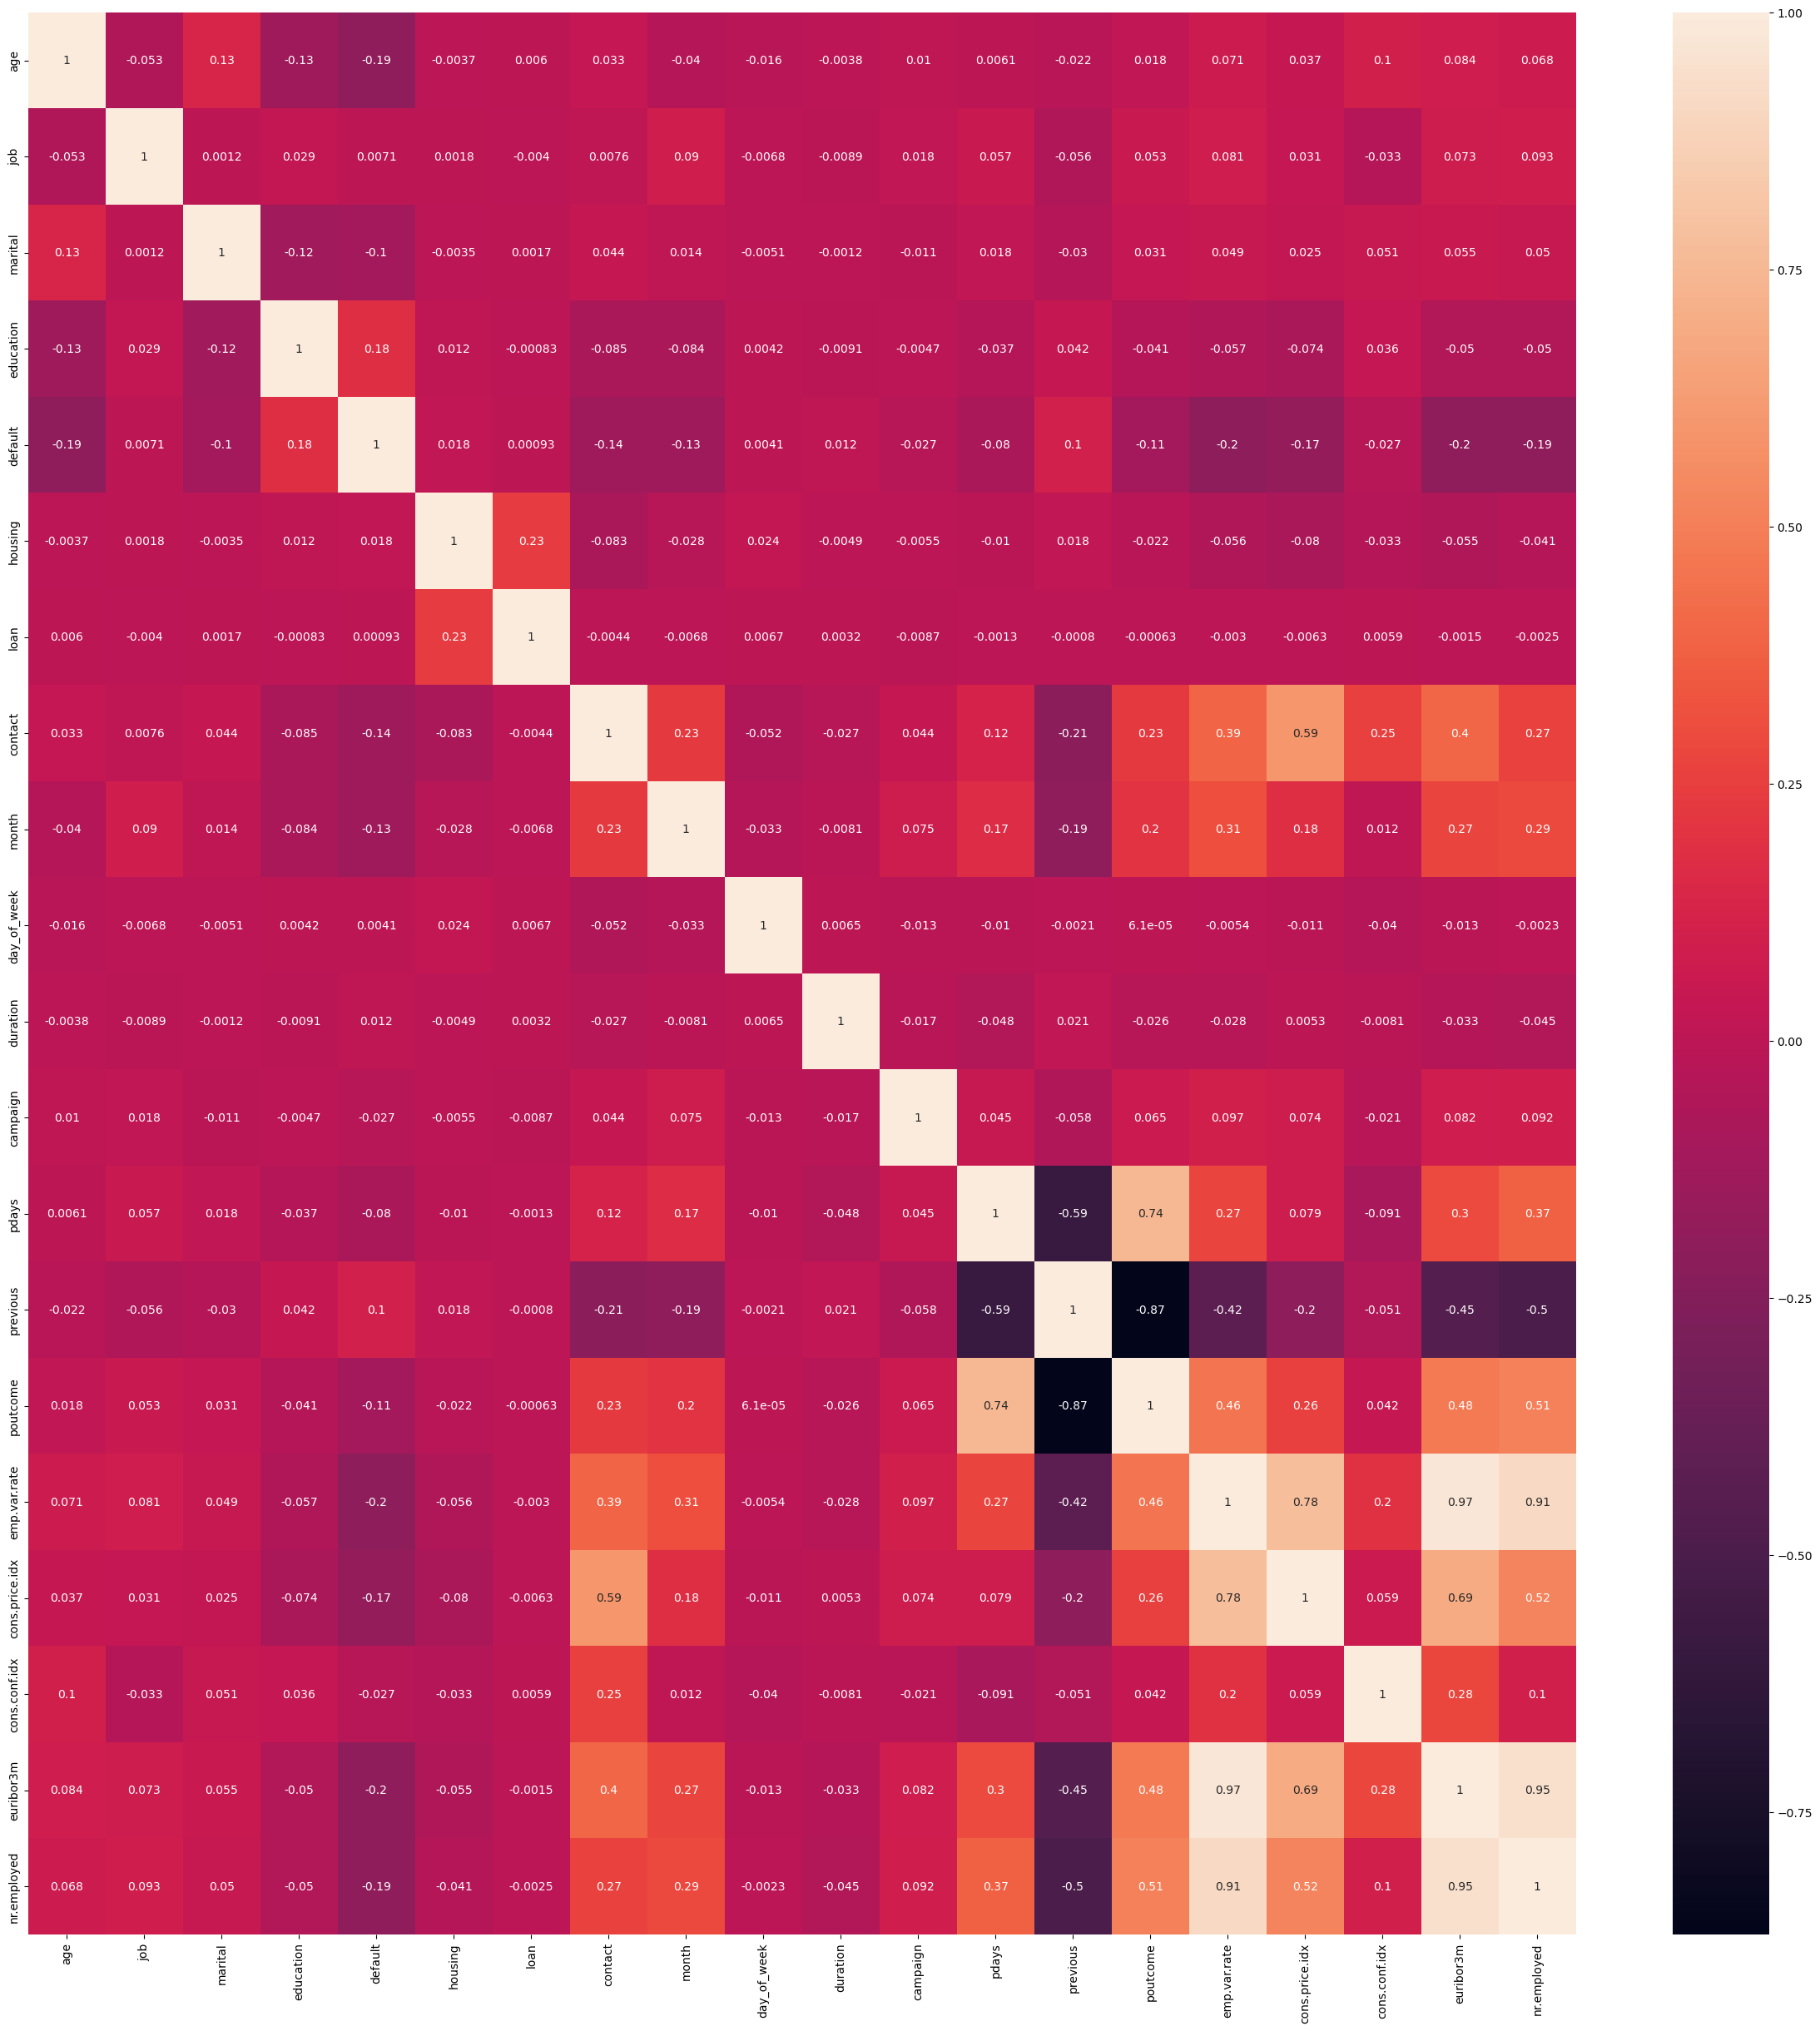

In [87]:
plt.figure(figsize=(30,30),facecolor='white')
sns.heatmap(x.corr(),annot=True) # plotting heatmap for independent features

Here it is observed that 'euribor3m' is having high correlation with two other columns so dropping it as it may cause duplications.

In [88]:
data.corr() 

age       job   marital  education   default   housing  \
age             1.000000 -0.052695  0.133334  -0.132605 -0.190914 -0.003721   
job            -0.052695  1.000000  0.001182   0.028967  0.007099  0.001770   
marital         0.133334  0.001182  1.000000  -0.117753 -0.103910 -0.003548   
education      -0.132605  0.028967 -0.117753   1.000000  0.178446  0.011989   
default        -0.190914  0.007099 -0.103910   0.178446  1.000000  0.017558   
housing        -0.003721  0.001770 -0.003548   0.011989  0.017558  1.000000   
loan            0.005951 -0.003950  0.001718  -0.000827  0.000930  0.234247   
contact         0.032989  0.007619  0.043540  -0.085334 -0.135275 -0.083414   
month          -0.039826  0.090358  0.014390  -0.083960 -0.131143 -0.028248   
day_of_week    -0.016050 -0.006782 -0.005119   0.004163  0.004094  0.024210   
duration       -0.003773 -0.008877 -0.001237  -0.009084  0.011805 -0.004868   
campaign        0.010061  0.018271 -0.010723  -0.004663 -0.026525 -0.005521   
pdays           0.006086  0.056815  0.017636  -0.037264 -0.080086 -0.010369   
previous       -0.021825 -0.055733 -0.030225   0.042451  0.102458  0.017634   
poutcome        0.017977  0.053368  0.030630  -0.040702 -0.108204 -0.021586   
emp.var.rate    0.070892  0.080785  0.048962  -0.057311 -0.203257 -0.055689   
cons.price.idx  0.036791  0.030502  0.025055  -0.074203 -0.168076 -0.079589   
cons.conf.idx   0.100817 -0.032605  0.050975   0.036485 -0.026502 -0.033427   
euribor3m       0.083740  0.073162  0.054645  -0.050011 -0.195335 -0.054702   
nr.employed     0.067970  0.092564  0.050074  -0.049918 -0.189846 -0.040882   
y              -0.020295 -0.058140 -0.026363   0.046635  0.099364  0.011436   

                    loan   contact     month  day_of_week  ...  campaign  \
age             0.005951  0.032989 -0.039826    -0.016050  ...  0.010061   
job            -0.003950  0.007619  0.090358    -0.006782  ...  0.018271   
marital         0.001718  0.043540  0.014390    -0.005119  ... -0.010723   
education      -0.000827 -0.085334 -0.083960     0.004163  ... -0.004663   
default         0.000930 -0.135275 -0.131143     0.004094  ... -0.026525   
housing         0.234247 -0.083414 -0.028248     0.024210  ... -0.005521   
loan            1.000000 -0.004361 -0.006791     0.006655  ... -0.008723   
contact        -0.004361  1.000000  0.226932    -0.052423  ...  0.043604   
month          -0.006791  0.226932  1.000000    -0.032646  ...  0.074865   
day_of_week     0.006655 -0.052423 -0.032646     1.000000  ... -0.012804   
duration        0.003246 -0.026665 -0.008070     0.006481  ... -0.016585   
campaign       -0.008723  0.043604  0.074865    -0.012804  ...  1.000000   
pdays          -0.001323  0.117999  0.173930    -0.010036  ...  0.045010   
previous       -0.000801 -0.212903 -0.189762    -0.002144  ... -0.058309   
poutcome       -0.000628  0.226872  0.201431     0.000061  ...  0.065065   
emp.var.rate   -0.003046  0.393730  0.313767    -0.005394  ...  0.097217   
cons.price.idx -0.006274  0.591596  0.181553    -0.011409  ...  0.073674   
cons.conf.idx   0.005871  0.251575  0.011647    -0.040300  ... -0.021192   
euribor3m      -0.001547  0.399892  0.273359    -0.012606  ...  0.081547   
nr.employed    -0.002470  0.269285  0.288054    -0.002293  ...  0.092326   
y               0.005051 -0.144774 -0.222777     0.003453  ... -0.047028   

                   pdays  previous  poutcome  emp.var.rate  cons.price.idx  \
age             0.006086 -0.021825  0.017977      0.070892        0.036791   
job             0.056815 -0.055733  0.053368      0.080785        0.030502   
marital         0.017636 -0.030225  0.030630      0.048962        0.025055   
education      -0.037264  0.042451 -0.040702     -0.057311       -0.074203   
default        -0.080086  0.102458 -0.108204     -0.203257       -0.168076   
housing        -0.010369  0.017634 -0.021586     -0.055689       -0.079589   
loan           -0.001323 -0.000801 -0.000628     -0.003046     

<Axes: >

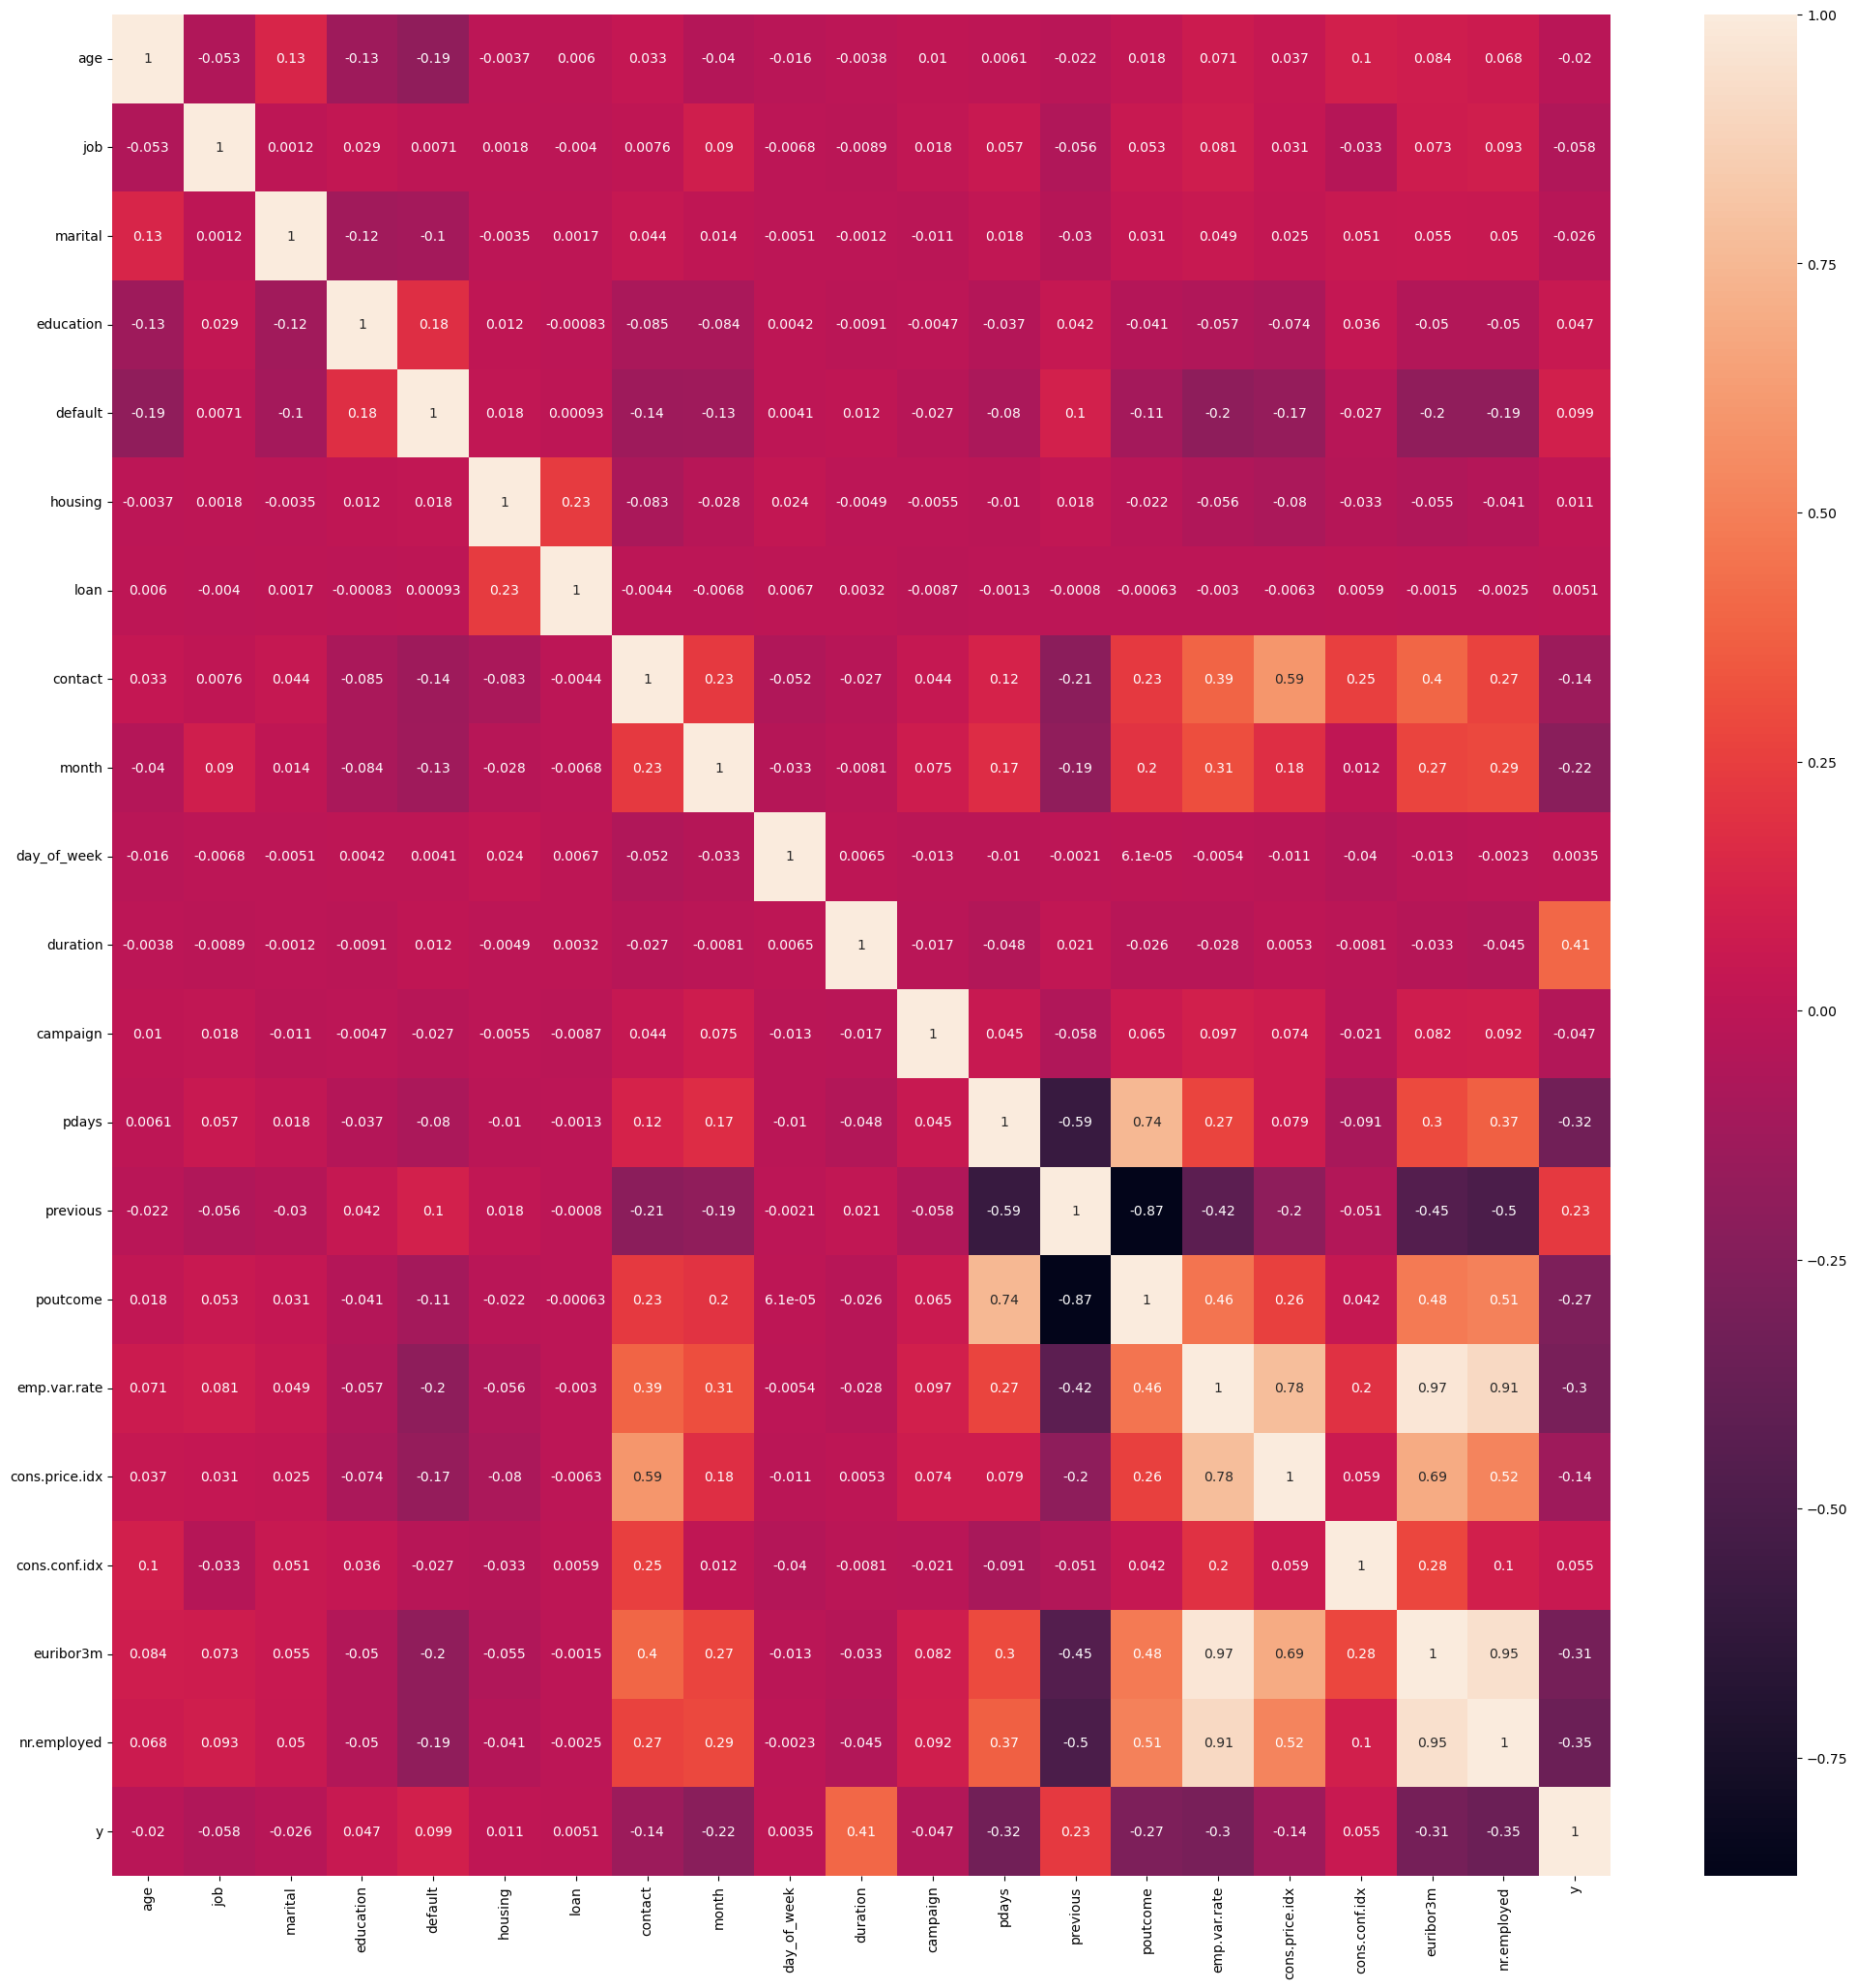

In [89]:
plt.figure(figsize=(25,25),facecolor='white')
sns.heatmap(data.corr(),annot=True)

In [90]:
data.drop('euribor3m',axis=1,inplace=True)

In [91]:
data.drop('duration',axis=1,inplace=True)

In [92]:
data

age  job  marital  education  default  housing  loan  contact  month  \
0       56    2        3          2        2        1     2        1      9   
1       57    7        3          5        1        1     2        1      9   
2       37    7        3          5        2        2     2        1      9   
3       40   10        3          1        2        1     2        1      9   
4       56    7        3          5        2        1     1        1      9   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   38    5        3          3        2        2     2        0      5   
41184   46    9        3          3        2        1     2        0      5   
41185   56    5        3          6        2        2     2        0      5   
41186   44    8        3          3        2        1     2        0      5   
41187   38    5        3          3        2        2     2        0      5   

       day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
0                3         1    999         0         2           1.1   
1                3         1    999         0         2           1.1   
2                3         1    999         0         2           1.1   
3                3         1    999         0         2           1.1   
4                3         1    999         0         2           1.1   
...            ...       ...    ...       ...       ...           ...   
41183            0         1    999         0         2          -1.1   
41184            0         1    999         0         2          -1.1   
41185            0         2    999         0         2          -1.1   
41186            0         1    999         0         2          -1.1   
41187            0         3    999         1         1          -1.1   

       cons.price.idx  cons.conf.idx  nr.employed  y  
0              93.994          -36.4       5191.0  0  
1              93.994          -36.4       5191.0  0  
2              93.994          -36.4       5191.0  0  
3              93.994          -36.4       5191.0  0  
4              93.994          -36.4       5191.0  0  
...               ...            ...          ... ..  
41183          94.767          -50.8       4963.6  1  
41184          94.767          -50.8       4963.6  0  
41185          94.767          -50.8       4963.6  0  
41186          94.767          -50.8       4963.6  1  
41187          94.767          -50.8       4963.6  0  

[41176 rows x 19 columns]

# ! SCALING

since the data seems to be more skewed we are using MinMaxScaling.

In [93]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [94]:
x_scaled=sc.fit_transform(x)
x_scaled

array([[0.75      , 0.2       , 1.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.76923077, 0.7       , 1.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       [0.38461538, 0.7       , 1.        , ..., 0.60251046, 0.95737928,
        0.85973535],
       ...,
       [0.75      , 0.5       , 1.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.51923077, 0.8       , 1.        , ..., 0.        , 0.08932215,
        0.        ],
       [0.40384615, 0.5       , 1.        , ..., 0.        , 0.08932215,
        0.        ]])

In [95]:
x=pd.DataFrame(x_scaled,columns=x.columns)
x

age  job  marital  education  default  housing  loan  contact  \
0      0.750000  0.2      1.0   0.333333      1.0      0.5   1.0      1.0   
1      0.769231  0.7      1.0   0.833333      0.5      0.5   1.0      1.0   
2      0.384615  0.7      1.0   0.833333      1.0      1.0   1.0      1.0   
3      0.442308  1.0      1.0   0.166667      1.0      0.5   1.0      1.0   
4      0.750000  0.7      1.0   0.833333      1.0      0.5   0.5      1.0   
...         ...  ...      ...        ...      ...      ...   ...      ...   
41171  0.403846  0.5      1.0   0.500000      1.0      1.0   1.0      0.0   
41172  0.557692  0.9      1.0   0.500000      1.0      0.5   1.0      0.0   
41173  0.750000  0.5      1.0   1.000000      1.0      1.0   1.0      0.0   
41174  0.519231  0.8      1.0   0.500000      1.0      0.5   1.0      0.0   
41175  0.403846  0.5      1.0   0.500000      1.0      1.0   1.0      0.0   

          month  day_of_week  duration  campaign  pdays  previous  poutcome  \
0      1.000000         0.75  0.053070       0.0    1.0  0.000000       1.0   
1      1.000000         0.75  0.030297       0.0    1.0  0.000000       1.0   
2      1.000000         0.75  0.045954       0.0    1.0  0.000000       1.0   
3      1.000000         0.75  0.030704       0.0    1.0  0.000000       1.0   
4      1.000000         0.75  0.062424       0.0    1.0  0.000000       1.0   
...         ...          ...       ...       ...    ...       ...       ...   
41171  0.555556         0.00  0.067914       0.0    1.0  0.000000       1.0   
41172  0.555556         0.00  0.077877       0.0    1.0  0.000000       1.0   
41173  0.555556         0.00  0.038430       0.2    1.0  0.000000       1.0   
41174  0.555556         0.00  0.089874       0.0    1.0  0.000000       1.0   
41175  0.555556         0.00  0.048597       0.4    1.0  0.142857       0.5   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          0.937500        0.698753        0.60251   0.957379     0.859735  
1          0.937500        0.698753        0.60251   0.957379     0.859735  
2          0.937500        0.698753        0.60251   0.957379     0.859735  
3          0.937500        0.698753        0.60251   0.957379     0.859735  
4          0.937500        0.698753        0.60251   0.957379     0.859735  
...             ...             ...            ...        ...          ...  
41171      0.479167        1.000000        0.00000   0.089322     0.000000  
41172      0.479167        1.000000        0.00000   0.089322     0.000000  
41173      0.479167        1.000000        0.00000   0.089322     0.000000  
41174      0.479167        1.000000        0.00000   0.089322     0.000000  
41175      0.479167        1.000000        0.00000   0.089322     0.000000  

[41176 rows x 20 columns]

In [96]:
pip install --upgrade scikit-learn imbalanced-learn


  Using cached imbalanced_learn-0.12.0-py3-none-any.whl (257 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


# ! SMOTE Analysis

SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used in dealing with imbalanced datasets, particularly in classification tasks. It is a type of oversampling method that generates synthetic samples from the minority class to balance the class distribution. The goal of SMOTE is to address the class imbalance problem by creating synthetic examples of the minority class rather than by replicating existing examples.

In [97]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm=SMOTE()

In [98]:
print(Counter(y))
x_sm,y_sm=sm.fit_resample(x,y)
print(Counter(x_sm))
print(Counter(y_sm))


Counter({'y': 1})
Counter({'age': 1, 'job': 1, 'marital': 1, 'education': 1, 'default': 1, 'housing': 1, 'loan': 1, 'contact': 1, 'month': 1, 'day_of_week': 1, 'duration': 1, 'campaign': 1, 'pdays': 1, 'previous': 1, 'poutcome': 1, 'emp.var.rate': 1, 'cons.price.idx': 1, 'cons.conf.idx': 1, 'euribor3m': 1, 'nr.employed': 1})
Counter({'y': 1})


In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.25,random_state=42)

In [100]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((54805, 20), (18269, 20), (54805, 1), (18269, 1))

# ! ALGORITHMIC EXECUTION

# 1. LOGISTIC REGRESSION

In [101]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [102]:
lr.fit(x_train,y_train)

LogisticRegression()

In [103]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [104]:
y_test

y
4293   1
28313  1
42943  1
71581  1
67128  1
...   ..
29141  0
55074  1
29490  0
71655  1
69817  1

[18269 rows x 1 columns]

In [105]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,confusion_matrix,roc_auc_score,roc_curve,auc

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      9203
           1       0.86      0.89      0.88      9066

    accuracy                           0.88     18269
   macro avg       0.88      0.88      0.88     18269
weighted avg       0.88      0.88      0.88     18269



In [107]:
print(accuracy_score(y_test,y_pred)*100)

87.8208987903005


In [108]:
print(f1_score(y_test,y_pred)*100)

87.93580220137721


[[7935 1268]
 [ 957 8109]]


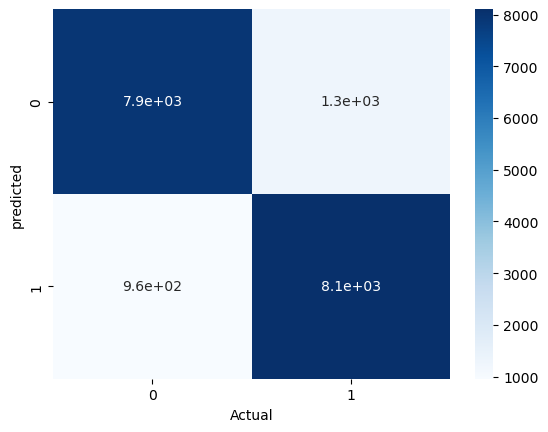

In [109]:
print(confusion_matrix(y_test,y_pred))
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [110]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.8783298046927839


In [111]:
thresholds

array([inf,  1.,  0.])

# 2. DECISION TREE

In [112]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [113]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [114]:
y_predict=model.predict(x_test)
y_predict

array([0, 1, 0, ..., 0, 0, 1])

In [115]:
y_test

y
4293   1
28313  1
42943  1
71581  1
67128  1
...   ..
29141  0
55074  1
29490  0
71655  1
69817  1

[18269 rows x 1 columns]

In [116]:
y_train_predict=model.predict(x_train)
y_train_predict

array([1, 1, 1, ..., 1, 0, 0])

In [117]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      9203
           1       0.91      0.92      0.92      9066

    accuracy                           0.92     18269
   macro avg       0.92      0.92      0.92     18269
weighted avg       0.92      0.92      0.92     18269



In [118]:
print(accuracy_score(y_test,y_predict))

0.9158684109694017


In [119]:
print(accuracy_score(y_train,y_train_predict))

1.0


In [120]:
print(y_test.shape)
print(y_predict.shape)

(18269, 1)
(18269,)


In [121]:
y_test = y_test['y'].values.ravel()
# or y_test.flatten()
y_predict = y_predict.ravel()

In [122]:
pd.crosstab(y_test,y_predict)

col_0     0     1
row_0            
0      8408   795
1       742  8324

In [123]:
print(confusion_matrix(y_test,y_predict))

[[8408  795]
 [ 742 8324]]


[[8408  795]
 [ 742 8324]]


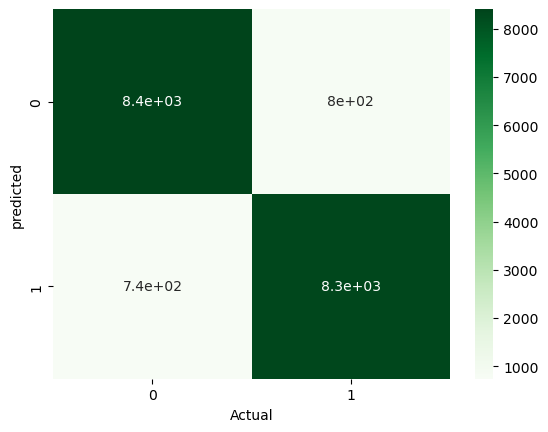

In [124]:
print(confusion_matrix(y_test,y_predict))
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap='Greens')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [125]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_predict)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.9158854361243188


In [126]:
thresholds

array([inf,  1.,  0.])

# 3. RANDOM FOREST 

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [128]:
rf.fit(x_train,y_train)


RandomForestClassifier()

In [129]:
y_pred1=model.predict(x_test)
y_pred1


array([0, 1, 0, ..., 0, 0, 1])

In [130]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

In [131]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      9203
           1       0.91      0.92      0.92      9066

    accuracy                           0.92     18269
   macro avg       0.92      0.92      0.92     18269
weighted avg       0.92      0.92      0.92     18269



In [132]:
print(accuracy_score(y_test,y_pred1))

0.9158684109694017


In [133]:
pd.crosstab(y_test,y_pred1)

col_0     0     1
row_0            
0      8408   795
1       742  8324

In [134]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred1)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.9158854361243188


In [135]:
thresholds

array([inf,  1.,  0.])

[[8408  795]
 [ 742 8324]]


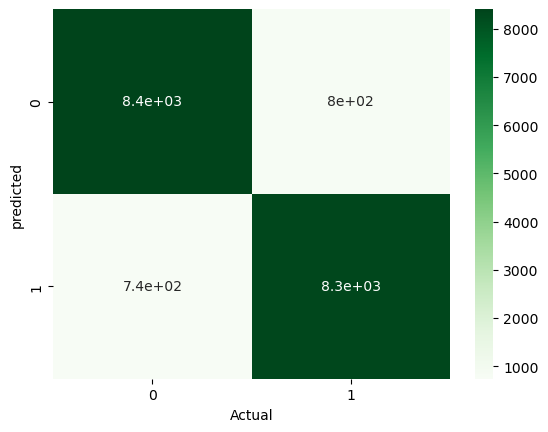

In [136]:
print(confusion_matrix(y_test,y_pred1))
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,cmap='Greens')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

# 4. SVM (Support Vector Machine)



In [137]:
from sklearn.svm import SVC
svc=SVC()

In [138]:
svc.fit(x_train,y_train)

SVC()

In [139]:
y_predict1=svc.predict(x_test)
y_predict1

array([0, 1, 0, ..., 0, 1, 1])

In [140]:
y_test

array([1, 1, 1, ..., 0, 1, 1])

In [141]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      9203
           1       0.86      0.95      0.90      9066

    accuracy                           0.90     18269
   macro avg       0.90      0.90      0.90     18269
weighted avg       0.90      0.90      0.90     18269



In [142]:
print(accuracy_score(y_test,y_predict1))

0.8964365865674093


In [143]:
pd.crosstab(y_test,y_predict1)

col_0     0     1
row_0            
0      7798  1405
1       487  8579

In [144]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svc,x,y,cv=5,scoring='accuracy')
print(scores)
print("cross validation scores",scores.mean())
print("standard deviation",scores.std())

[0.88732394 0.38445659 0.87043109 0.20862174 0.63630844]
cross validation scores 0.5974283588598989
standard deviation 0.2670614779916458


[[8408  795]
 [ 742 8324]]


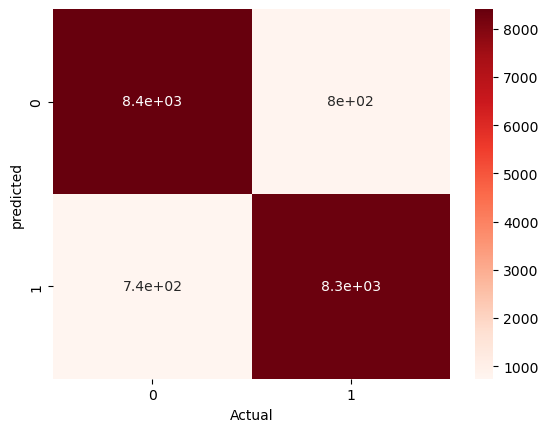

In [145]:
print(confusion_matrix(y_test,y_predict))
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap='Reds')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [146]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_predict1)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.8968076032621461


# 5. ANN (Artificial Neural Networks)

In [147]:
from sklearn.neural_network import MLPClassifier
ann=MLPClassifier(hidden_layer_sizes=(50,4),learning_rate_init=0.1,
                 max_iter=100,random_state=3)

In [148]:
ann.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 4), learning_rate_init=0.1, max_iter=100,
              random_state=3)

In [149]:
y_predict_proba=model.predict_proba(x_test)

In [150]:
y_predict_proba

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [151]:
y_predict_ann=ann.predict(x_test)
y_predict_ann

array([0, 0, 0, ..., 0, 0, 0])

In [152]:
print(classification_report(y_test,y_predict_ann))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      9203
           1       0.00      0.00      0.00      9066

    accuracy                           0.50     18269
   macro avg       0.25      0.50      0.33     18269
weighted avg       0.25      0.50      0.34     18269



In [153]:
pd.crosstab(y_test,y_predict_ann)

col_0     0
row_0      
0      9203
1      9066

In [154]:
print(accuracy_score(y_test,y_predict_ann))

0.5037495210465817


In [155]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_predict_ann)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.5


In [156]:
thresholds

array([inf,  0.])

[[9203    0]
 [9066    0]]


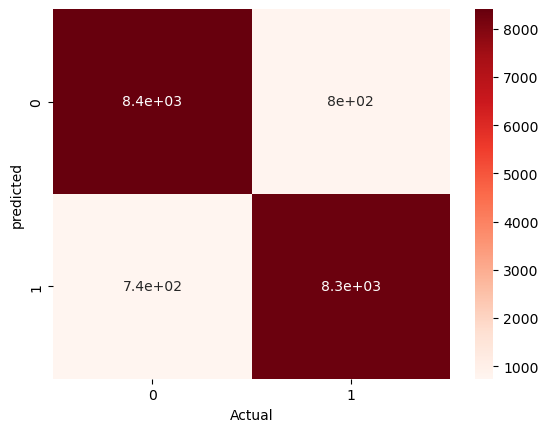

In [157]:
print(confusion_matrix(y_test,y_predict_ann))
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap='Reds')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

# 6. KNN (k-nearest neighbor)

In [158]:
from sklearn.neighbors import KNeighborsClassifier

In [159]:
error_rate=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_sm,y_sm)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=y_test))

In [160]:
error_rate

[0.0,
 0.004269527615085664,
 0.0395752367398325,
 0.03612677212764793,
 0.06163446275110843,
 0.056927034867808854,
 0.07685149707154196,
 0.07280091959056324,
 0.08960534238327221,
 0.08413158903059828]

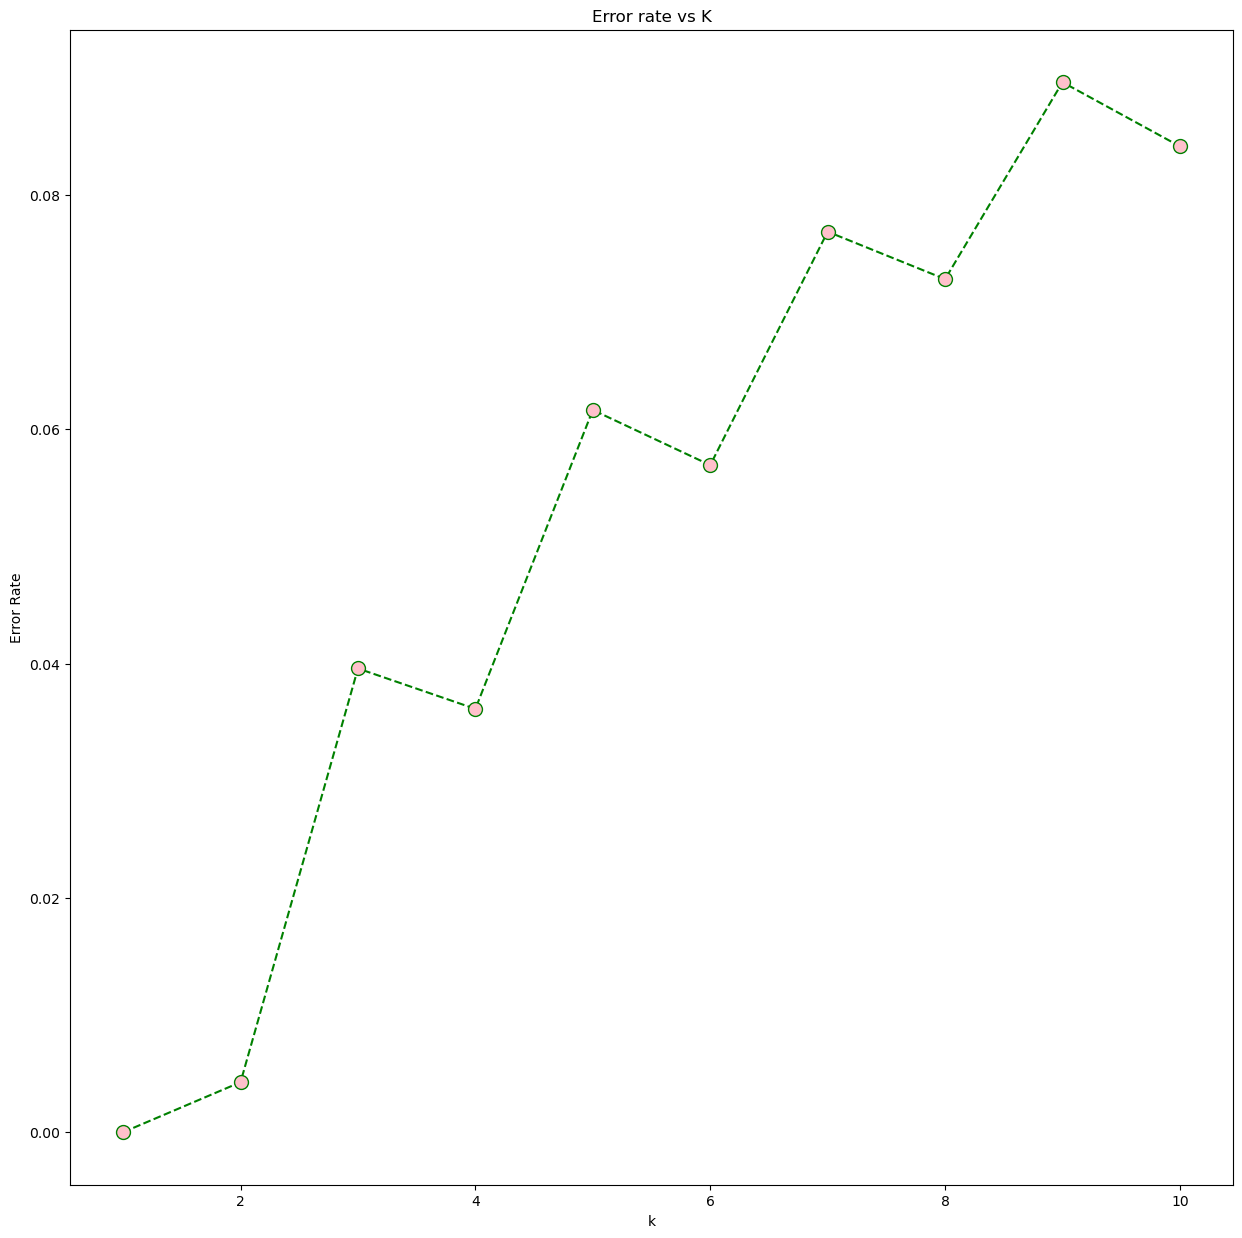

In [161]:
plt.figure(figsize=(15,15))
plt.plot(range(1,11),error_rate,color='green',linestyle='dashed',marker='o',markerfacecolor='pink',markersize=10)
plt.title('Error rate vs K')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

In [162]:
knn1=KNeighborsClassifier(n_neighbors=3)
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [163]:
y_predict_knn=knn1.predict(x_test)
y_predict_knn

array([1, 1, 1, ..., 0, 1, 1])

In [164]:
print(classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      9203
           1       0.86      0.99      0.92      9066

    accuracy                           0.92     18269
   macro avg       0.92      0.92      0.91     18269
weighted avg       0.92      0.92      0.91     18269



In [165]:
pd.crosstab(y_test,y_predict)

col_0     0     1
row_0            
0      8408   795
1       742  8324

In [166]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_predict_knn)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.9156008532595872


In [167]:
thresholds

array([inf,  1.,  0.])

[[7747 1456]
 [  96 8970]]


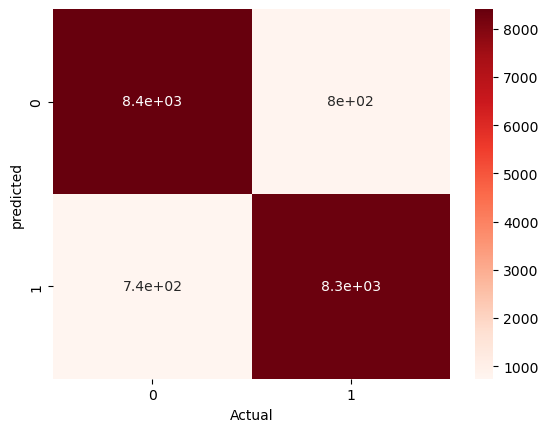

In [168]:
print(confusion_matrix(y_test,y_predict_knn))
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap='Reds')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

# 7. GRADIENT BOOSTING

In [169]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()

In [170]:
gbm.fit(x_train,y_train)

GradientBoostingClassifier()

In [171]:
gbm_predict=gbm.predict(x_test)

In [172]:
gbm_predict

array([0, 1, 0, ..., 0, 1, 1])

In [173]:
print(classification_report(y_test,gbm_predict))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      9203
           1       0.90      0.96      0.93      9066

    accuracy                           0.93     18269
   macro avg       0.93      0.93      0.93     18269
weighted avg       0.93      0.93      0.93     18269



In [174]:
pd.crosstab(y_test,gbm_predict)

col_0     0     1
row_0            
0      8268   935
1       404  8662

In [175]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,gbm_predict)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.9269202973095102


In [176]:
thresholds

array([inf,  1.,  0.])

[[8268  935]
 [ 404 8662]]


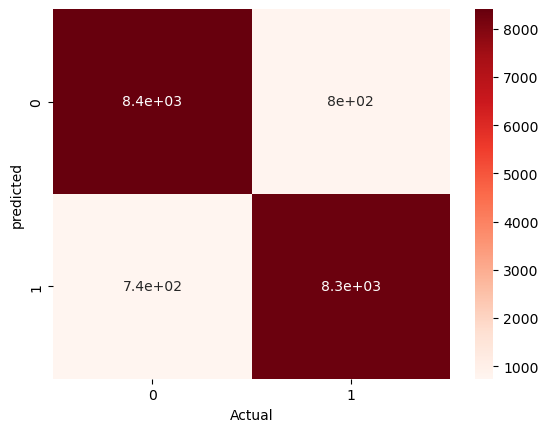

In [177]:
print(confusion_matrix(y_test,gbm_predict))
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap='Reds')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

# 8. XG BOOST (Extreme Gradient Boosting)

In [178]:
from xgboost import XGBClassifier

In [179]:
xgb=XGBClassifier()

In [180]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [181]:
xgb_predict=xgb.predict(x_test)
xgb_predict

array([0, 1, 1, ..., 0, 1, 1])

In [182]:
print(classification_report(y_test,xgb_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9203
           1       0.95      0.95      0.95      9066

    accuracy                           0.95     18269
   macro avg       0.95      0.95      0.95     18269
weighted avg       0.95      0.95      0.95     18269



In [183]:
pd.crosstab(y_test,xgb_predict)

col_0     0     1
row_0            
0      8772   431
1       464  8602

--> Since XG Boost is showing more Accuracy rather than all other Algorithms, we test this algorithm with the process of Hyperparameter tuning.

# Hyperparameter tuning of XG boost :

In [184]:
from sklearn.model_selection import RandomizedSearchCV

In [185]:
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_depth=[2,3,4,5]
learning_rate=[0.1,0.2,0.3]
gamma=[0,1,2,3,4]
subsample=[0.5,0.7,1]
colsample_bytree=[0.5,0.7,1]

In [186]:
params={'max_depth':max_depth,'learning_rate':learning_rate,'n_estimators':n_estimators,
       'gamma':gamma,'subsample':subsample,'colsample_bytree':colsample_bytree}

In [187]:
XGB=XGBClassifier(random_state=42)

In [188]:
rcv=RandomizedSearchCV(XGB,scoring='accuracy',param_distributions=params,
                      n_iter=100,cv=3,random_state=42,n_jobs=-1)

In [189]:
rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1],
                                        'gamma': [0, 1, 2, 3, 4],
                                        'learning_rate': [0.1, 0.2, 0.3],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000],
                                        'subsample': [0.5, 0.7, 1]},
                   random_state=42, scoring='accuracy')

In [190]:
cv_best_params=rcv.best_params_

In [191]:
print(f"best parameters:{cv_best_params}")

best parameters:{'subsample': 0.7, 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 0.5}


In [192]:
cv_best_params

{'subsample': 0.7,
 'n_estimators': 2000,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 2,
 'colsample_bytree': 0.5}

In [193]:
XGB2=XGBClassifier(subsample=0.7,
 n_estimators=400,
 max_depth=5,
 learning_rate=0.1,
 gamma=0,
 colsample_bytree=0.7)

In [194]:
XGB2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [195]:
y_predict_xgb=XGB2.predict(x_test)

In [196]:
y_predict_xgb

array([0, 1, 1, ..., 0, 1, 1])

In [197]:
print(classification_report(y_test,y_predict_xgb))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      9203
           1       0.95      0.95      0.95      9066

    accuracy                           0.95     18269
   macro avg       0.95      0.95      0.95     18269
weighted avg       0.95      0.95      0.95     18269



In [198]:
pd.crosstab(y_test,y_predict_xgb)

col_0     0     1
row_0            
0      8767   436
1       485  8581

[[8767  436]
 [ 485 8581]]


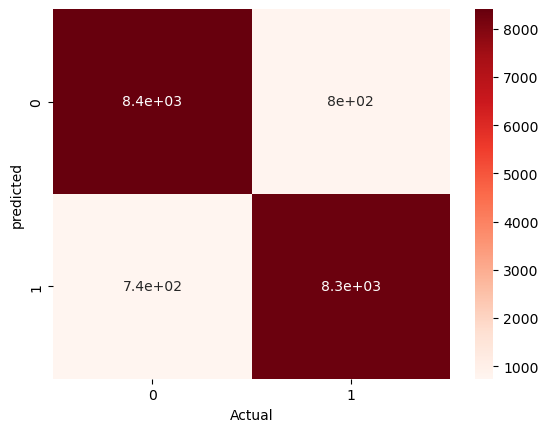

In [199]:
print(confusion_matrix(y_test,y_predict_xgb))
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap='Reds')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [200]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_predict_xgb)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.9495637818349214


In [201]:
thresholds

array([inf,  1.,  0.])

# 9. NAIVE BAYES

In [202]:
from sklearn.naive_bayes import GaussianNB

In [203]:
clf=GaussianNB()

In [204]:
clf.fit(x_train,y_train)

GaussianNB()

In [205]:
y_pred_clf=clf.predict(x_test)

In [206]:
y_pred_clf

array([0, 1, 1, ..., 0, 1, 0])

In [207]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      9203
           1       0.80      0.72      0.75      9066

    accuracy                           0.77     18269
   macro avg       0.77      0.77      0.77     18269
weighted avg       0.77      0.77      0.77     18269



In [208]:
pd.crosstab(y_test,y_pred_clf)

col_0     0     1
row_0            
0      7546  1657
1      2567  6499

[[7546 1657]
 [2567 6499]]


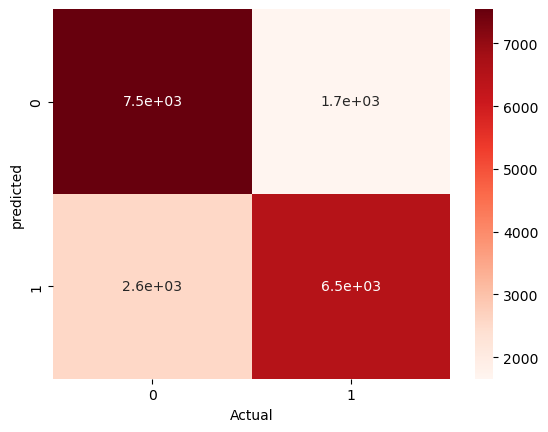

In [209]:
print(confusion_matrix(y_test,y_pred_clf))
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred_clf),annot=True,cmap='Reds')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [210]:
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_pred_clf)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score)

0.7684020983767391


In [211]:
thresholds

array([inf,  1.,  0.])

In [212]:
scores = [0.87, 0.91, 0.91, 0.89, 0.5,0.91,0.92,0.94,0.77]
algorithms = ["Logistic Regression","Decision Tree","Random Forest","SVM","ANN","KNN","Gradient Boosting","XG boost","Naive Bayes"]
min_length = min(len(algorithms), len(scores))

for i in range(min_length):
    print("The Roc-Auc score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The Roc-Auc score achieved using Logistic Regression is: 0.87 %
The Roc-Auc score achieved using Decision Tree is: 0.91 %
The Roc-Auc score achieved using Random Forest is: 0.91 %
The Roc-Auc score achieved using SVM is: 0.89 %
The Roc-Auc score achieved using ANN is: 0.5 %
The Roc-Auc score achieved using KNN is: 0.91 %
The Roc-Auc score achieved using Gradient Boosting is: 0.92 %
The Roc-Auc score achieved using XG boost is: 0.94 %
The Roc-Auc score achieved using Naive Bayes is: 0.77 %


# ! CONCLUSION

--> In conclusion, Bank Marketing prediction using machine learning has demonstrated its efficiancy as a valuable tool for enhancing who are interested in term deposits among existing customers and to conclude same methods for new customers.

-->The findings from the analysis highlight the following key points:

1. Model Performance: The Xg Boost model has emerged as the top performer ,achieving an impressive Roc_auc score of 0.94. This high level recall indicates that the model can effectively predict term deposits of existing customers.

2. Alternative model: The Gradient boosting model, although slightly less recall score of 0.92,still offers a strong predictive capability.This suggests that there are multiple machine learnings approaches available to bank marketing ,allowing for flexibilty in model selection.

3. Apart from roc_auc curves we can also use recall and precision and f1-Score for better understanding the model.

# ! CHALLENGES FACED

1. Imbalanced data: The data is highly imbalanced and have to use various balancing techniques like random under sampling and random over sampling.

2. However the data with majority class are learnt by data and minority class prediction is very low.finally came up with SMOTE technique for balancing the data.

3. Feature Correlation: When dealing with a large number of columns or features, finding meaningful correlations between them can be challenging. Correlation analysis helps identify which features are strongly related to the target variable and which are not. This is important for feature selection and dimensionality reduction. Correlation matrices, scatter plots, and statistical tests are commonly used techniques to understand feature relationships. However, for a large number of columns, this process can become complex and time-consuming.

4. Hyperparameter Tuning: Hyperparameter tuning involves finding the best set of hyperparameters for a machine learning model to achieve optimal performance. This process often requires multiple iterations of training and evaluating the model with different hyperparameter configurations. It can be time-consuming because it involves a search in a high-dimensional space of hyperparameters, and each iteration requires training the model, which can be computationally expensive.